In [1]:
import seaborn as sns
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from SHARED.params import *
from SHARED.display_trajectories import *
# matplotlib.use('Agg')
%matplotlib widget

from matplotlib.ticker import ScalarFormatter


/tmp/ipykernel_13643/826628808.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.figlegend()


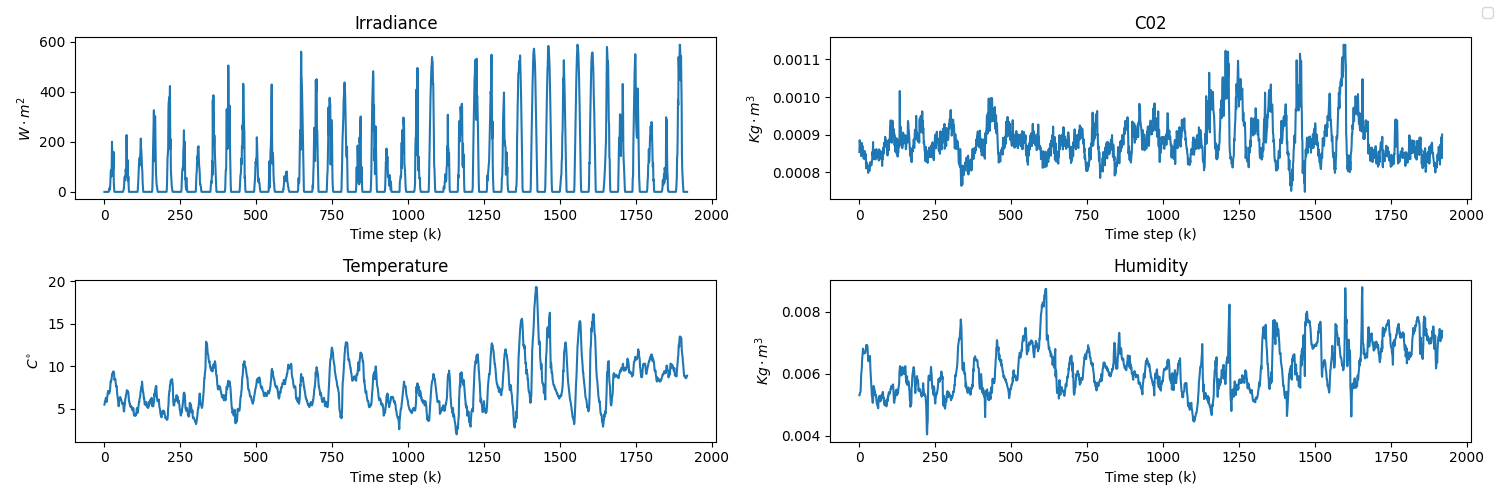

In [2]:



#Weather Data
results_path = "results/RL/Deterministic/agent_14/D_log.csv"

D_log = loadtxt(results_path, delimiter=',')

plt.figure(figsize=(15, 5))
plt.subplot(2,2,1)
plt.plot (D_log[:,0])
plt.title('Irradiance')
plt.ylabel("$W \cdot m^2$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,2)
plt.plot (D_log[:,1])
plt.title('C02')
plt.ylabel("$Kg \cdot m^3$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,3)
plt.plot (D_log[:,2])
plt.title('Temperature')
plt.ylabel("$C^{\circ}$")
plt.xlabel("Time step (k)")

plt.subplot(2,2,4)
plt.plot (D_log[:,3])
plt.title('Humidity')
plt.ylabel("$Kg \cdot m^3$")
plt.xlabel("Time step (k)")


plt.tight_layout()
plt.figlegend()
plt.show()

plt.savefig('TU Delft Thesis/figures/weather_data.pdf', format='pdf')


/tmp/ipykernel_13643/4268165778.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


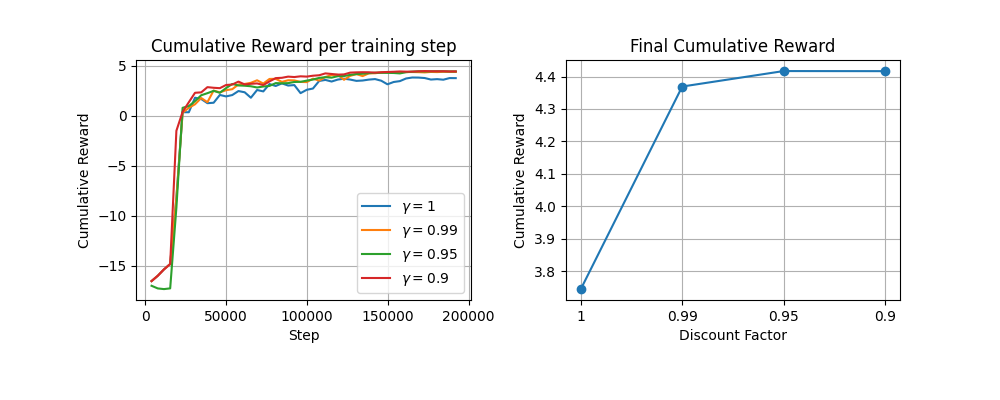

In [3]:
agent_6_with_header = np.genfromtxt('results/RL/Deterministic/agent_6.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_9_with_header = np.genfromtxt('results/RL/Deterministic/agent_9.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_10_with_header = np.genfromtxt('results/RL/Deterministic/agent_10.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_14_with_header = np.genfromtxt('results/RL/Deterministic/agent_14.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
agent_11_with_header = np.genfromtxt('results/RL/Deterministic/agent_11.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

fig, (ax1, ax2) = plt.subplots(1,2, sharex=False,figsize=(10, 4),layout='constrained')

ax1.set_title('Cumulative Reward per training step')
# plt.subplot(1,2,1)
ax1.plot(agent_6_with_header['Step'],agent_6_with_header['Value'], label = '$\gamma = 1$')
ax1.plot(agent_9_with_header['Step'],agent_9_with_header['Value'], label = '$\gamma = 0.99$')
ax1.plot(agent_14_with_header['Step'],agent_14_with_header['Value'], label = '$\gamma = 0.95$')
ax1.plot(agent_10_with_header['Step'],agent_10_with_header['Value'], label = '$\gamma = 0.9$')
ax1.grid()
ax1.legend()
ax1.set_ylabel("Cumulative Reward")
ax1.set_xlabel("Step")
plt.savefig('TU Delft Thesis/figures/gamma_reward_training.pdf', format='pdf')


ax2.set_title('Final Cumulative Reward')
cum_rewards = [agent_6_with_header['Value'][-1],agent_9_with_header['Value'][-1],agent_14_with_header['Value'][-1],agent_10_with_header['Value'][-1]]
discount_factor = ['1','0.99','0.95','0.9']
ax2.plot(discount_factor,cum_rewards,marker='o')
ax2.grid()
ax2.set_ylabel("Cumulative Reward")
ax2.set_xlabel("Discount Factor")

# Create a shared legend
# handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25, hspace=0.4)
# plt.tight_layout()
plt.show()

plt.savefig('TU Delft Thesis/figures/gamma_reward.pdf', format='pdf')


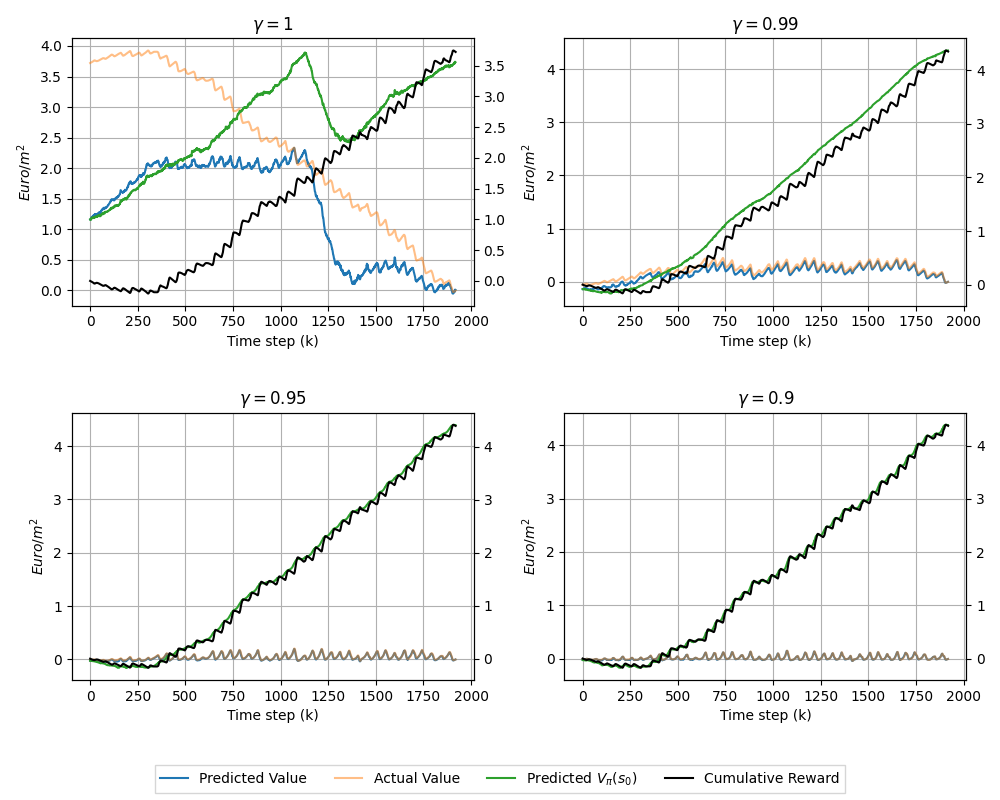

In [4]:
agent_6_rewards              = loadtxt('results/RL/Deterministic/agent_6/rewards_log.csv', delimiter=',')
agent_6_values               = loadtxt('results/RL/Deterministic/agent_6/vf_log.csv', delimiter=',')
agent_6_cost             = loadtxt('results/RL/Deterministic/agent_6/cost_log.csv', delimiter=',')

agent_9_rewards              = loadtxt('results/RL/Deterministic/agent_9/rewards_log.csv', delimiter=',')
agent_9_values               = loadtxt('results/RL/Deterministic/agent_9/vf_log.csv', delimiter=',')
agent_9_cost             = loadtxt('results/RL/Deterministic/agent_9/cost_log.csv', delimiter=',')

agent_10_rewards              = loadtxt('results/RL/Deterministic/agent_10/rewards_log.csv', delimiter=',')
agent_10_values               = loadtxt('results/RL/Deterministic/agent_10/vf_log.csv', delimiter=',')
agent_10_cost             = loadtxt('results/RL/Deterministic/agent_10/cost_log.csv', delimiter=',')

agent_14_rewards              = loadtxt('results/RL/Deterministic/agent_14/rewards_log.csv', delimiter=',')
agent_14_values               = loadtxt('results/RL/Deterministic/agent_14/vf_log.csv', delimiter=',')
agent_14_cost             = loadtxt('results/RL/Deterministic/agent_14/cost_log.csv', delimiter=',')

def actual_values(cost_log, gamma = 1):
    vf = []
    cum = 0
    for i,r in enumerate(reversed(cost_log)):
        cum += r
        vf.append(cum)
        cum *=gamma
    return vf[::-1]


agents_rewards = [agent_6_rewards, agent_9_rewards,  agent_14_rewards,agent_10_rewards]
agents_values = [agent_6_values, agent_9_values,  agent_14_values,agent_10_values,]
agents_actual_values = [actual_values(agent_6_cost, gamma = 1),actual_values(agent_9_cost, gamma = 0.99),actual_values(agent_14_cost, gamma = 0.95),actual_values(agent_10_cost,gamma = 0.9)]
gamma = [1,0.99,0.95,0.9]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data
for i, (rewards, values, act_values) in enumerate(zip(agents_rewards, agents_values,agents_actual_values)):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax2 = ax.twinx() 
    
    ax2.plot(rewards,color = 'k', label='Cumulative Reward')
    # ax2.set_ylabel("$Euro/m^2$")
    ax2.plot ()
    ax.plot(values, label="Predicted Value")
    # ax.plot(values + rewards[1:], label = 'Quality Measure')
    ax.plot(act_values, label = "Actual Value", alpha = 0.5)
    ax.grid()
    ax.set_ylabel("$Euro/m^2$")
    ax.set_xlabel("Time step (k)")
    ax.plot (values + rewards[:-1], label = 'Predicted $V_{\pi}(s_0)$')
    ax.set_title(f"$\gamma = ${gamma[i]}")

# Get handles and labels for the legend
handles, labels = axs[0, 0].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add figlegend
fig.legend(handles+handles2, labels+labels2, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(bottom=0.15,hspace=0.4)
# Display the plot
plt.show()

plt.savefig('TU Delft Thesis/figures/vf_vs_gamma.pdf', format='pdf')

/tmp/ipykernel_13643/2651637587.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


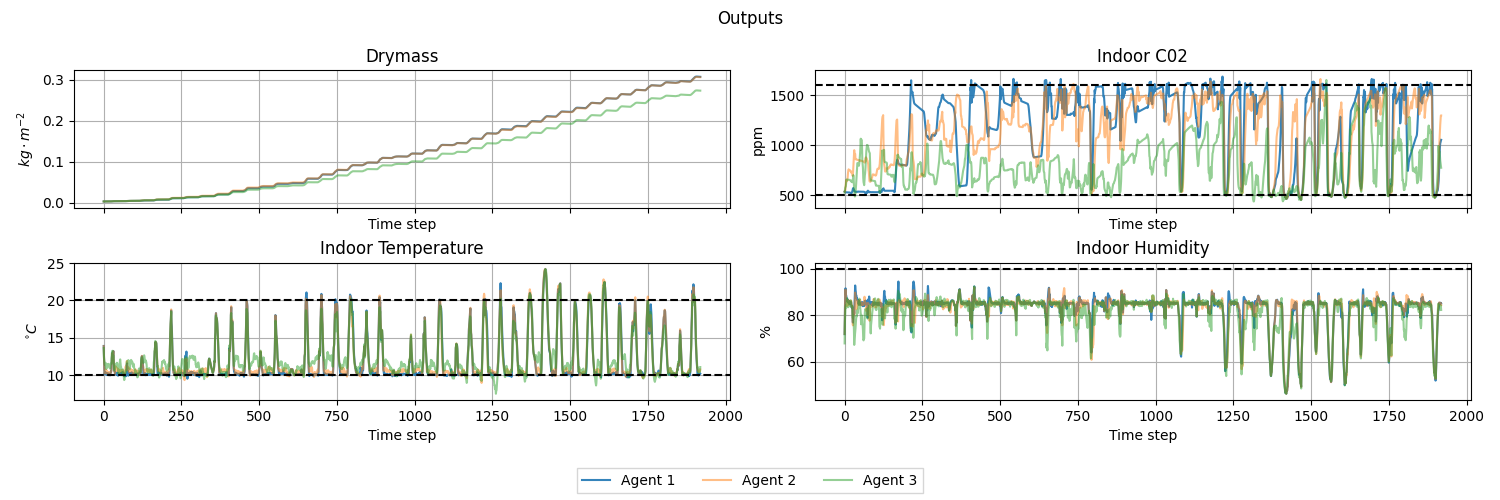

/tmp/ipykernel_13643/2651637587.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


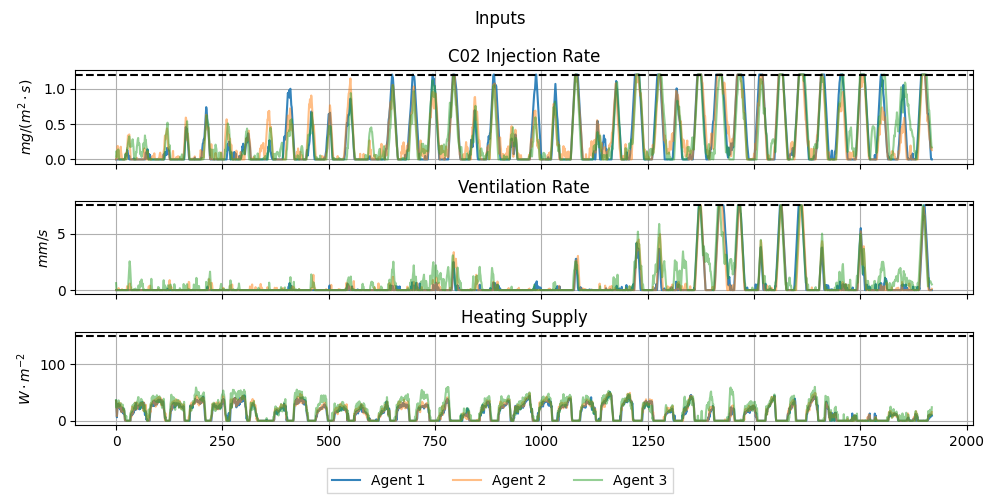

In [27]:
agent_1_outputs              = loadtxt('results/RL/Deterministic/agent_11_abs/Y_log.csv', delimiter=',')
agent_1_inputs             = loadtxt('results/RL/Deterministic/agent_11_abs/U_log.csv', delimiter=',')


agent_2_outputs              = loadtxt('results/RL/Deterministic/agent_11_abs_tanh/Y_log.csv', delimiter=',')
agent_2_inputs             = loadtxt('results/RL/Deterministic/agent_11_abs_tanh/U_log.csv', delimiter=',')

agent_3_outputs              = loadtxt('results/RL/Deterministic/agent_6_abs_tanh/Y_log.csv', delimiter=',')
agent_3_inputs             = loadtxt('results/RL/Deterministic/agent_6_abs_tanh/U_log.csv', delimiter=',')

fig, axs_y = plt.subplots(2,2, sharex=True, sharey=False, layout='constrained', figsize=(15, 5))
fig.suptitle("Outputs")
    
for i, (title, ylabel) in enumerate([("Drymass", "$kg \cdot m^{-2}$"), ("Indoor C02", "ppm"),
                                    ("Indoor Temperature", "$^{\circ}C$"), ("Indoor Humidity","%")]):
    ax = axs_y[i // 2, i % 2]
    # ax = axs_y[i]
    ax.set_title(title)
    ax.plot(agent_1_outputs[:,i],alpha = 0.9,     label = "Agent 1")
    ax.plot(agent_2_outputs[:,i],alpha = 0.5,     label = "Agent 2")
    ax.plot(agent_3_outputs[:,i],alpha = 0.5,     label = "Agent 3")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time step")
    # ax.legend()

axs_y[0,1].axhline(y=C02_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[0,1].axhline(y=C02_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

#Humidity Constrains
axs_y[1,1].axhline(y=HUM_MAX_CONSTRAIN,color = 'k' ,linestyle = '--')

#Temperature Constrains
axs_y[1,0].axhline(y=TEMP_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[1,0].axhline(y=TEMP_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

handles, labels = axs_y[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.2,hspace=0.4)
plt.show()
plt.savefig('TU Delft Thesis/figures/selected_policies_outputs.pdf', format='pdf')


fig, axs_u = plt.subplots(3,1, sharex=True, sharey=False, layout='constrained', figsize=(10, 5))
fig.suptitle("Inputs")
    
for i, (title, ylabel) in enumerate([("C02 Injection Rate", "$mg/(m^{2} \cdot s)$"), ("Ventilation Rate", "$mm/s$"),
                                            ("Heating Supply", "$W \cdot m^{-2}$")]):
    # ax = axs_y[i // 2, i % 2]
    ax = axs_u[i]
    ax.set_title(title)
    ax.plot(agent_1_inputs[:,i],alpha = 0.9,    label = "Agent 1")
    ax.plot(agent_2_inputs[:,i],alpha = 0.5,    label = "Agent 2")
    ax.plot(agent_3_inputs[:,i],alpha = 0.5,    label = "Agent 3")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    # ax.legend()
    
axs_u[0].axhline(y=u_max[0],color = 'k' ,linestyle = '--')
axs_u[1].axhline(y=u_max[1],color = 'k' ,linestyle = '--')
axs_u[2].axhline(y=u_max[2],color = 'k' ,linestyle = '--')

handles, labels = axs_u[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.15,hspace=0.4)
plt.show()
plt.savefig('TU Delft Thesis/figures/selected_policies_inputs.pdf', format='pdf')

results/RL/Stochastic/nominal/0.2_0


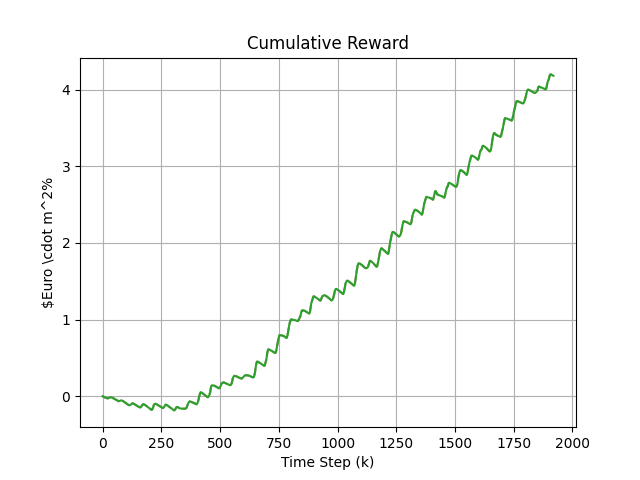

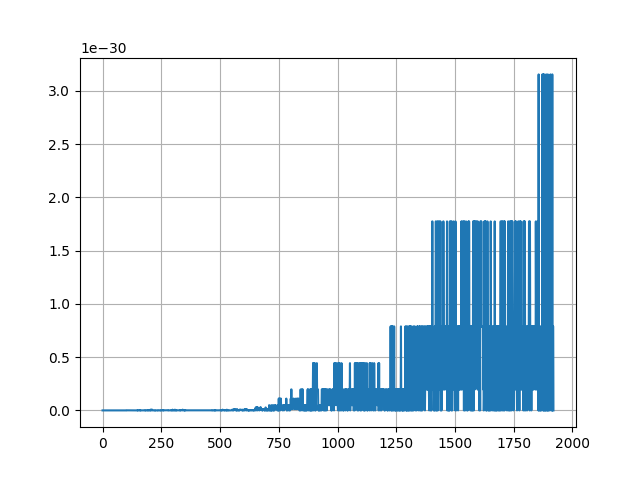

----------------------------  ------------
EPI                (EURO/m2)   4.78167
Total growth       (kg/m2)     0.297021
Total C02 usage    (kg/m2)     1.00681
Total Heating      (kWh)      12.846
Computational Time (s)         0.000211046
FINAL PERFORMANCE              4.17827
Variance                       0
----------------------------  ------------


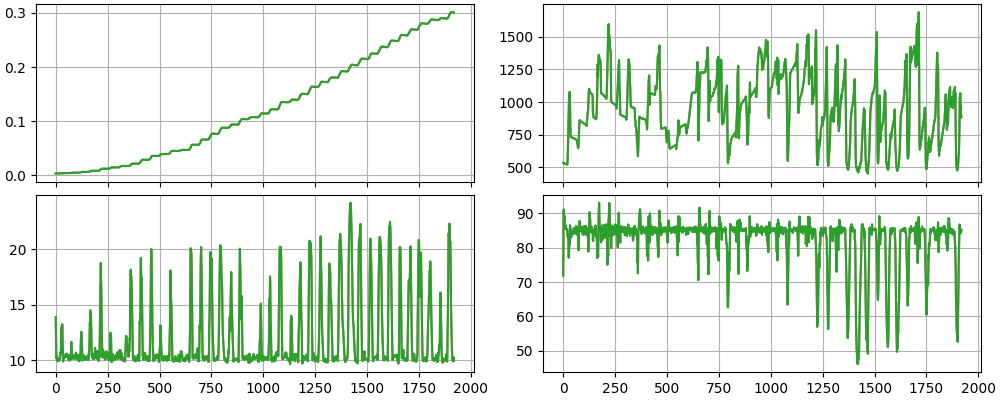

In [6]:


# path = 'results/RL/Stochastic/0.05/scale_' + str(0.05)
path = 'results/RL/Stochastic/nominal/0.2_' + str(0)
# path = 'results/MPC/Stochastic/1_hr/scale_' + str(noise_scale)
print (path)
average_metrics(path)


/tmp/ipykernel_13643/4029377027.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


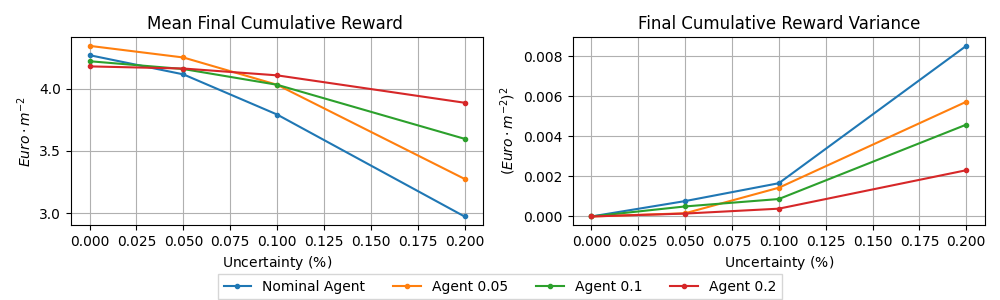

In [7]:
#mean
mean_agent_005 = [4.3432,4.24985,4.03077,3.2749]
mean_agent_01  = [4.21976,4.15714,4.03076,3.59688]
mean_agent_02 = [4.17827,4.16127,4.10644,3.88648]
mean_nominal = [4.2683,4.1143,3.79179,2.97292]

#variance
variance_agent_005 = [0,0.00015972,0.00143446,0.00572537]
variance_agent_01  = [0,0.000500268,0.000870857,0.0045832]
variance_agent_02 = [0,0.000144415,0.000389025,0.00230789]
variance_nominal = [0,0.000767577,0.00166026,0.00851586]

x = [0, 0.05, 0.1, 0.2]
# Create subplots
fig, (ax1, ax2) = plt.subplots(1,2, sharex=False,figsize=(10, 3),layout='constrained')

# Plotting the means
ax1.plot(x, mean_nominal,marker = '.', label='Nominal Agent')
ax1.plot(x, mean_agent_005, marker = '.', label='Agent 0.05')
ax1.plot(x, mean_agent_01, marker = '.',label='Agent 0.1')
ax1.plot(x, mean_agent_02, marker = '.',label='Agent 0.2')
ax1.set_ylabel('$Euro \cdot m^{-2} $')
ax1.set_title('Mean Final Cumulative Reward ')
ax1.set_xlabel('Uncertainty ($\%$)')
ax1.grid(True)

# Plotting the variances
ax2.plot(x, variance_nominal, marker = '.',label='Nominal Agent')
ax2.plot(x, variance_agent_005,marker = '.', label='Agent 0.05')
ax2.plot(x, variance_agent_01, marker = '.',label='Agent 0.1')
ax2.plot(x, variance_agent_02, marker = '.',label='Agent 0.2')
ax2.set_xlabel('Uncertainty ($\%$)')
ax2.set_ylabel('$(Euro \cdot m^{-2} )^2$')
ax2.set_title('Final Cumulative Reward Variance')
ax2.grid(True)

# Create a shared legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25, hspace=0.4)
# plt.tight_layout()
plt.show()
plt.savefig('TU Delft Thesis/figures/stochastic_rl_policies.pdf', format='pdf')

/tmp/ipykernel_13643/2467633200.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


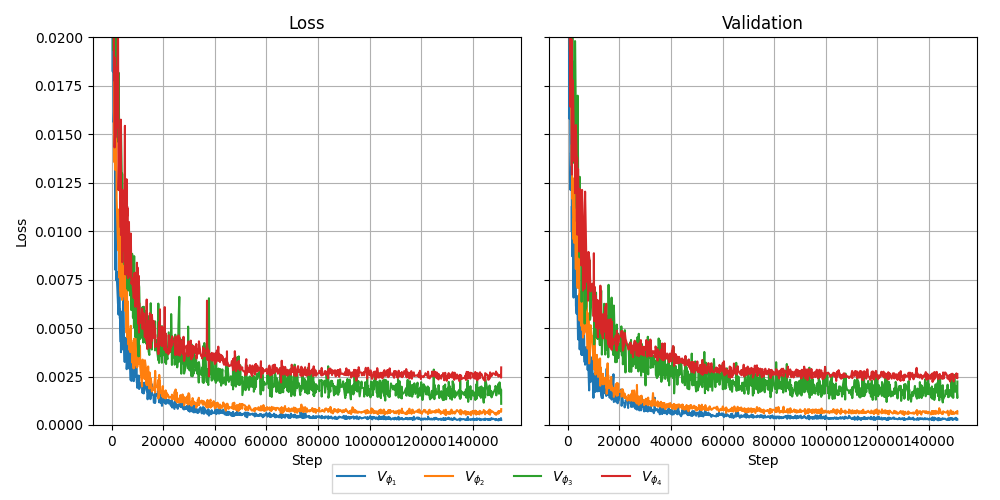

In [8]:
deep_full = np.genfromtxt('results/deep_full.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_less = np.genfromtxt('results/deep_less.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_reduced = np.genfromtxt('results/deep_reduced.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
shallow_full = np.genfromtxt('results/shallow_full.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')


deep_full_val = np.genfromtxt('results/deep_full_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_less_val = np.genfromtxt('results/deep_less_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
deep_reduced_val = np.genfromtxt('results/deep_reduced_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
shallow_full_val = np.genfromtxt('results/shallow_full_val.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

fig, axs = plt.subplots(1,2, sharex=False, sharey=True, layout='constrained', figsize=(10, 5))
loss_ax = axs[0]
val_ax = axs[1]

loss_ax.plot(deep_full['Step'],deep_full['Value'], label = "$V_{\phi_1}$")
loss_ax.plot(deep_less['Step'],deep_less['Value'], label = "$V_{\phi_2}$")
loss_ax.plot(shallow_full['Step'],shallow_full['Value'], label = "$V_{\phi_3}$")
loss_ax.plot(deep_reduced['Step'],deep_reduced['Value'], label = "$V_{\phi_4}$")
loss_ax.grid()
# loss_ax.legend()
loss_ax.set_ylim([0, 0.02])
loss_ax.set_ylabel("Loss")
loss_ax.set_xlabel("Step")
loss_ax.set_title('Loss')


val_ax.plot(deep_full_val['Step'],deep_full_val['Value'], label = "$V_1$")
val_ax.plot(deep_less_val['Step'],deep_less_val['Value'], label = "$V_2$")
val_ax.plot(shallow_full_val['Step'],shallow_full_val['Value'], label = "$V_3$")
val_ax.plot(deep_reduced_val['Step'],deep_reduced_val['Value'], label = "$V_4$")
val_ax.grid()
# val_ax.legend()
val_ax.set_ylim([0, 0.02])
val_ax.set_xlabel("Step")
val_ax.set_title('Validation')



handles, labels = loss_ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.15, hspace=0.4)

plt.show()

plt.savefig('TU Delft Thesis/figures/tr_training_graphs.pdf', format='pdf')

4.684890686591984
array([ 34.55451026,  75.15320254, 118.01523247, 185.10472578,
       273.42819576, 361.34298414])


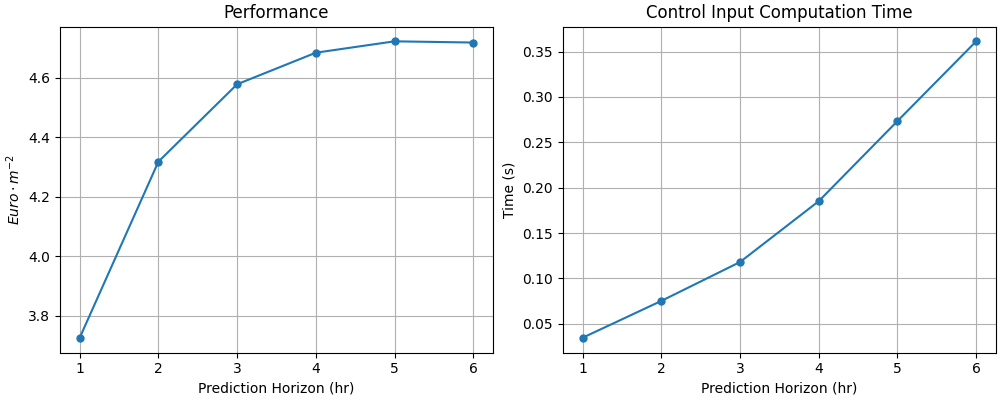

/tmp/ipykernel_13643/90905339.py:95: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


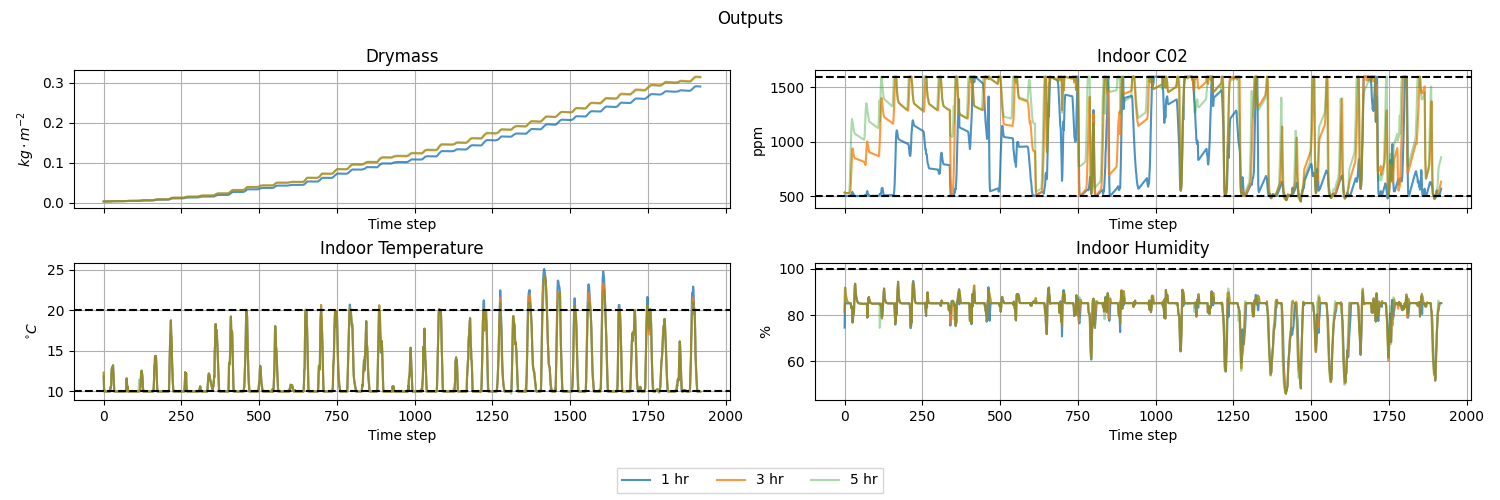

/tmp/ipykernel_13643/90905339.py:123: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


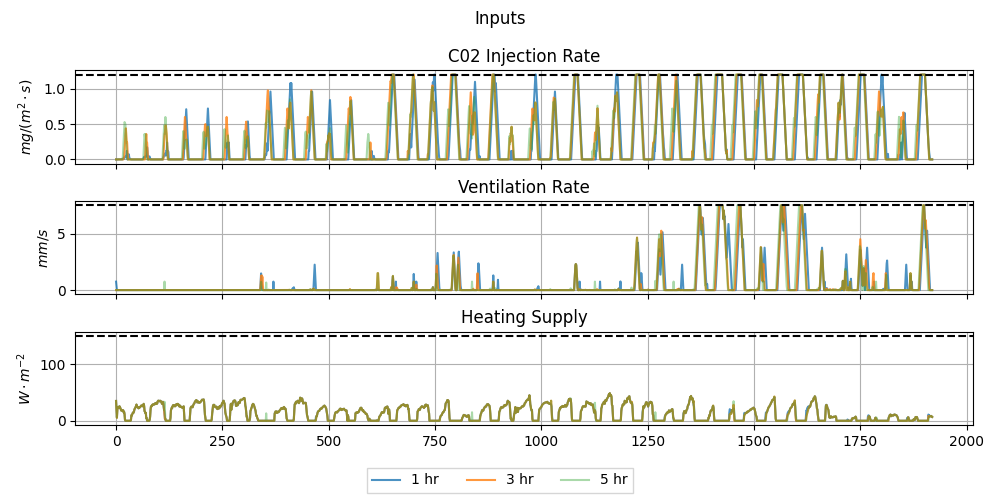

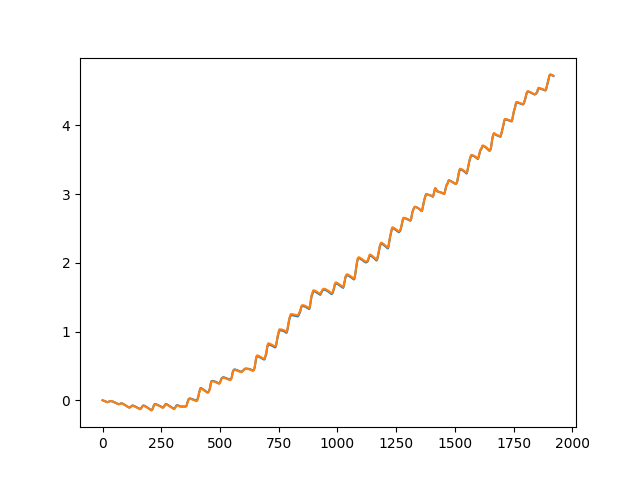

In [29]:
mpc_1hr_r               = loadtxt('results/MPC/Deterministic/1/Sim_0/rewards_log.csv', delimiter=',')
mpc_2hr_r              = loadtxt('results/MPC/Deterministic/2/Sim_0/rewards_log.csv', delimiter=',')
mpc_3hr_r              = loadtxt('results/MPC/Deterministic/3/Sim_0/rewards_log.csv', delimiter=',')
mpc_4hr_r              = loadtxt('results/MPC/Deterministic/4/Sim_0/rewards_log.csv', delimiter=',')
mpc_5hr_r              = loadtxt('results/MPC/Deterministic/5/Sim_0/rewards_log.csv', delimiter=',')
mpc_6hr_r              = loadtxt('results/MPC/Deterministic/6/Sim_0/rewards_log.csv', delimiter=',')

mpc_1hr_t              = loadtxt('results/MPC/Deterministic/1/Sim_0/comp_time_log.csv', delimiter=',')
mpc_2hr_t              = loadtxt('results/MPC/Deterministic/2/Sim_0/comp_time_log.csv', delimiter=',')
mpc_3hr_t              = loadtxt('results/MPC/Deterministic/3/Sim_0/comp_time_log.csv', delimiter=',')
mpc_4hr_t              = loadtxt('results/MPC/Deterministic/4/Sim_0/comp_time_log.csv', delimiter=',')
mpc_5hr_t              = loadtxt('results/MPC/Deterministic/5/Sim_0/comp_time_log.csv', delimiter=',')
mpc_6hr_t              = loadtxt('results/MPC/Deterministic/6/Sim_0/comp_time_log.csv', delimiter=',')

mpc_1hr_y              = loadtxt('results/MPC/Deterministic/1/Sim_0/Y_log.csv', delimiter=',')
mpc_2hr_y              = loadtxt('results/MPC/Deterministic/2/Sim_0/Y_log.csv', delimiter=',')
mpc_3hr_y              = loadtxt('results/MPC/Deterministic/3/Sim_0/Y_log.csv', delimiter=',')
mpc_4hr_y              = loadtxt('results/MPC/Deterministic/4/Sim_0/Y_log.csv', delimiter=',')
mpc_5hr_y              = loadtxt('results/MPC/Deterministic/5/Sim_0/Y_log.csv', delimiter=',')
mpc_6hr_y              = loadtxt('results/MPC/Deterministic/6/Sim_0/Y_log.csv', delimiter=',')

mpc_1hr_u              = loadtxt('results/MPC/Deterministic/1/Sim_0/U_log.csv', delimiter=',')
mpc_2hr_u              = loadtxt('results/MPC/Deterministic/2/Sim_0/U_log.csv', delimiter=',')
mpc_3hr_u              = loadtxt('results/MPC/Deterministic/3/Sim_0/U_log.csv', delimiter=',')
mpc_4hr_u              = loadtxt('results/MPC/Deterministic/4/Sim_0/U_log.csv', delimiter=',')
mpc_5hr_u              = loadtxt('results/MPC/Deterministic/5/Sim_0/U_log.csv', delimiter=',')
mpc_6hr_u              = loadtxt('results/MPC/Deterministic/6/Sim_0/U_log.csv', delimiter=',')

# agent_9_rewards               = loadtxt('results/RL/Deterministic/agent_9/rewards_log.csv', delimiter=',')
# agent_10_rewards              = loadtxt('results/RL/Deterministic/agent_10/rewards_log.csv', delimiter=',')
# agent_14_rewards              = loadtxt('results/RL/Deterministic/agent_14/rewards_log.csv', delimiter=',')



print(mpc_4hr_r[-1])
perf = np.array([mpc_1hr_r[-1],mpc_2hr_r[-1],mpc_3hr_r[-1],mpc_4hr_r[-1],mpc_5hr_r[-1],mpc_6hr_r[-1]])
time = np.array([np.mean(mpc_1hr_t),np.mean(mpc_2hr_t),np.mean(mpc_3hr_t),np.mean(mpc_4hr_t),np.mean(mpc_5hr_t),np.mean(mpc_6hr_t)])*1000
pprint (time)

final_mpc_r = perf
final_mpc_t = time/1000
t_horizon = ['1','2','3','4','5','6']
# fig,axs = plt.subplots(1,2, sharex=False,figsize=(10, 3),layout='constrained')

fig, (ax1, ax2) = plt.subplots(1,2, sharex=False,figsize=(10, 4),layout='constrained')

ax1.plot(t_horizon,perf, marker = ".", markersize = 10)
ax1.grid()
ax1.set_ylabel("$Euro \cdot m^{-2}$")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_title("Performance")
# ax1.xticks(range(len(t_horizon)), t_horizon)
# ax1.savefig("figures/mpc_nominal_perf.pdf", format = "pdf")


ax2.plot(t_horizon,final_mpc_t, marker = ".", markersize = 10)
ax2.set_ylabel("Time (s)")
ax2.grid()
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_title("Control Input Computation Time")

plt.savefig("TU Delft Thesis/figures/mpc_nominal.pdf", format = "pdf")
plt.show()


fig, axs_y = plt.subplots(2,2, sharex=True, sharey=False, layout='constrained', figsize=(15, 5))
fig.suptitle("Outputs")
    
for i, (title, ylabel) in enumerate([("Drymass", "$kg \cdot m^{-2}$"), ("Indoor C02", "ppm"),
                                    ("Indoor Temperature", "$^{\circ}C$"), ("Indoor Humidity","%")]):
    ax = axs_y[i // 2, i % 2]
    # ax = axs_y[i]
    ax.set_title(title)
    ax.plot(mpc_1hr_y[:,i],alpha = 0.8,     label = "1 hr")
    ax.plot(mpc_3hr_y[:,i],alpha = 0.8,     label = "3 hr")
    ax.plot(mpc_5hr_y[:,i],alpha = 0.4,     label = "5 hr")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time step")
    # ax.legend()

axs_y[0,1].axhline(y=C02_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[0,1].axhline(y=C02_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

#Humidity Constrains
axs_y[1,1].axhline(y=HUM_MAX_CONSTRAIN,color = 'k' ,linestyle = '--')

#Temperature Constrains
axs_y[1,0].axhline(y=TEMP_MAX_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')
axs_y[1,0].axhline(y=TEMP_MIN_CONSTRAIN_MPC,color = 'k' ,linestyle = '--')

handles, labels = axs_y[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.2,hspace=0.4)
plt.show()
plt.savefig('TU Delft Thesis/figures/mpc_outputs_time_series.pdf', format='pdf')


fig, axs_u = plt.subplots(3,1, sharex=True, sharey=False, layout='constrained', figsize=(10, 5))
fig.suptitle("Inputs")
    
for i, (title, ylabel) in enumerate([("C02 Injection Rate", "$mg/(m^{2} \cdot s)$"), ("Ventilation Rate", "$mm/s$"),
                                            ("Heating Supply", "$W \cdot m^{-2}$")]):
    # ax = axs_y[i // 2, i % 2]
    ax = axs_u[i]
    ax.set_title(title)
    ax.plot(mpc_1hr_u[:,i],alpha = 0.8,    label = "1 hr")
    ax.plot(mpc_3hr_u[:,i],alpha = 0.8,    label = "3 hr")
    ax.plot(mpc_5hr_u[:,i],alpha = 0.4,    label = "5 hr")
    ax.grid(True)
    ax.set_ylabel(ylabel)
    # ax.legend()
    
axs_u[0].axhline(y=u_max[0],color = 'k' ,linestyle = '--')
axs_u[1].axhline(y=u_max[1],color = 'k' ,linestyle = '--')
axs_u[2].axhline(y=u_max[2],color = 'k' ,linestyle = '--')

handles, labels = axs_u[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)

plt.tight_layout()
fig.subplots_adjust(bottom=0.15,hspace=0.4)
plt.show()
plt.savefig('TU Delft Thesis/figures/mpc_inputs_times_series.pdf', format='pdf')

plt.figure ()
plt.plot (mpc_6hr_r)
plt.plot (mpc_5hr_r)

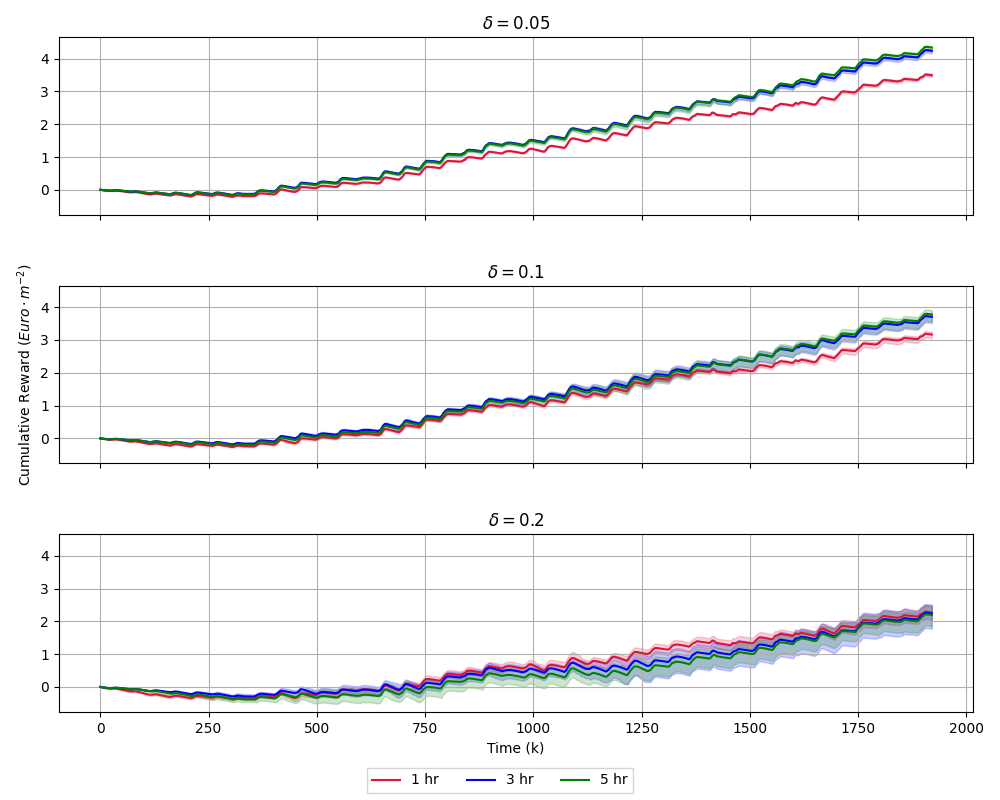

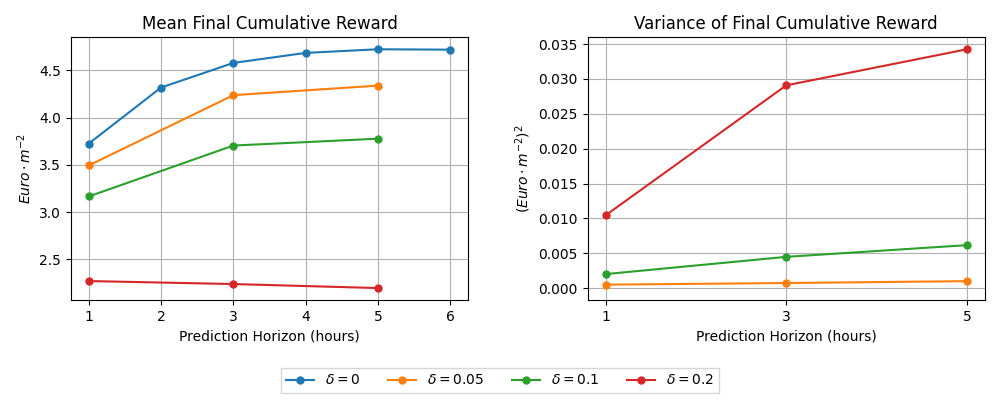

In [10]:
path = 'results/MPC/Stochastic/5_hr/scale_' + str(0.05)

fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(10,8))
noise = [0.05,0.1,0.2]

mean_rewards = {}
var_rewards = {}

for e,l in enumerate(noise):

    reward_logs = {}
    Y_logs = {}
    U_logs = {}
    comp_times = {}
    vf_logs = {}
     
    mean_rewards[l] = []
    var_rewards[l] = [] 
        
    t = range(1921) 
    toSee = [1,3,5]
    for j in toSee:
        path = 'results/MPC/Stochastic/'+str(j)+'_hr/scale_' + str(l)
        reward_logs[str(j)] = []
        Y_logs[str(j)] = []
        U_logs[str(j)] = []
        comp_times[str(j)] = []
        vf_logs[str(j)] = []
        for sim in range(30):
            sim_path = "/Sim_" + str(sim) + '/'
            reward_logs[str(j)].append( loadtxt(path + sim_path + 'rewards_log.csv' , delimiter=',') )
            Y_logs[str(j)].append( loadtxt(path + sim_path + 'Y_log.csv' , delimiter=',') )
            U_logs[str(j)].append( loadtxt(path + sim_path + 'U_log.csv' , delimiter=',') )
            comp_times[str(j)].append( loadtxt(path + sim_path + 'comp_time_log.csv' , delimiter=',') )
            if os.path.exists(path + sim_path + 'vf_log.csv'):
                vf_logs[str(j)].append( loadtxt(path + sim_path + 'vf_log.csv', delimiter=',') )
            
            
    # print (reward_logs.items())       
    stacked_rewards_1 = np.stack(reward_logs[str(toSee[0])])
    stacked_rewards_2 = np.stack(reward_logs[str(toSee[1])])
    stacked_rewards_3 = np.stack(reward_logs[str(toSee[2])])

    avg_rewards_1 = np.mean(stacked_rewards_1, axis=0)
    avg_rewards_2 = np.mean(stacked_rewards_2, axis=0)
    avg_rewards_3 = np.mean(stacked_rewards_3, axis=0)
    
    var_rewards_1 = np.var(stacked_rewards_1, axis=0)
    var_rewards_2 = np.var(stacked_rewards_2, axis=0)
    var_rewards_3 = np.var(stacked_rewards_3, axis=0)

    min_rewards_1 = np.min(stacked_rewards_1, axis=0)
    max_rewards_1 = np.max(stacked_rewards_1, axis=0)

    min_rewards_2 = np.min(stacked_rewards_2, axis=0)
    max_rewards_2 = np.max(stacked_rewards_2, axis=0)

    min_rewards_3 = np.min(stacked_rewards_3, axis=0)
    max_rewards_3 = np.max(stacked_rewards_3, axis=0)


    mean_rewards[l] = [avg_rewards_1[-1],avg_rewards_2[-1],avg_rewards_3[-1]]    
    var_rewards[l] = [var_rewards_1[-1],var_rewards_2[-1],var_rewards_3[-1]]

    ax[e].plot (t,avg_rewards_1, color = "crimson",label = str(toSee[0]) + " hr")
    ax[e].fill_between(t, min_rewards_1, max_rewards_1, color="crimson", alpha=0.2)

    ax[e].plot (t,avg_rewards_2, color = "blue",label = str(toSee[1]) + " hr")
    ax[e].fill_between(t, min_rewards_2, max_rewards_2, color="blue", alpha=0.2)

    ax[e].plot (t,avg_rewards_3, color = "green", label = str(toSee[2]) + " hr")
    ax[e].fill_between(t, min_rewards_3, max_rewards_3, color="green", alpha=0.2)
    ax[e].grid()
    ax[e].set_title("$\delta = $" + str(l))
    # ax[e].legend()
    
    
ax[1].set_ylabel("Cumulative Reward ($Euro \cdot m^{-2}$)")
ax[2].set_xlabel("Time (k)")    
# fig.suptitle("Average Cumulative Reward vs Prediction Horizon")
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.11,hspace=0.4)
plt.show()



plt.savefig('TU Delft Thesis/figures/stochastic_mpc_rewards_time.pdf', format='pdf')

tt = [1,3,5]
fig, (ax1,ax2) = plt.subplots(1,2, sharex=False, sharey=False, figsize = (10,4))
ax1.plot ([1,2,3,4,5,6],perf, marker = ".", markersize = 10, label = "$\delta=$"+str(0))
ax1.plot (tt,mean_rewards[0.05], label = "$\delta=$" + str(0.05), marker = ".", markersize = 10)
ax1.plot (tt,mean_rewards[0.1], label = "$\delta=$" + str(0.1), marker = ".", markersize = 10)
ax1.plot (tt,mean_rewards[0.2], label = "$\delta=$" + str(0.2), marker = ".", markersize = 10)

ax1.set_title("Mean Final Cumulative Reward")
ax1.set_ylabel("$Euro \cdot m^{-2}$")
ax1.set_xlabel("Prediction Horizon (hours)")
# ax1.xticks(range(len(tt)), tt)
ax1.grid()

ax2.plot ([0,0,0],label  = "$\delta=$"+str(0), alpha = 0)
ax2.plot (var_rewards[0.05], label = "$\delta=$" + str(0.05), marker = ".", markersize = 10)
ax2.plot (var_rewards[0.1], label = "$\delta=$" + str(0.1), marker = ".", markersize = 10)
ax2.plot (var_rewards[0.2], label = "$\delta=$" + str(0.2), marker = ".", markersize = 10)

ax2.set_xticks(range(len(tt)), tt)
ax2.set_ylabel("$(Euro \cdot m^{-2})^2$")
ax2.set_xlabel("Prediction Horizon (hours)")
ax2.set_title("Variance of Final Cumulative Reward")
ax2.grid()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/stochastic_mpc_perf.pdf', format='pdf')


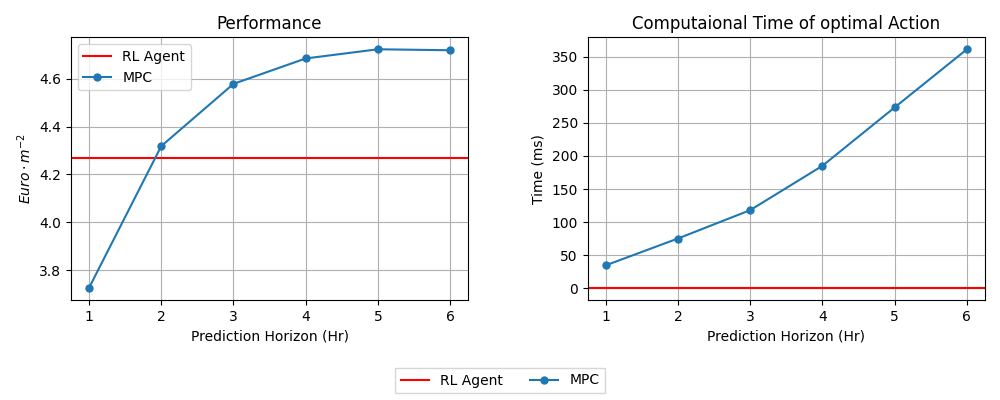

In [11]:
agent_1_r              = loadtxt('results/RL/Deterministic/agent_11_abs/rewards_log.csv', delimiter=',')
agent_1_t              = loadtxt('results/RL/Deterministic/agent_11_abs/comp_time_log.csv', delimiter=',')

t = [1,2,3,4,5,6]
mpc_r = np.array([mpc_1hr_r[-1],mpc_2hr_r[-1],mpc_3hr_r[-1],mpc_4hr_r[-1],mpc_5hr_r[-1],mpc_6hr_r[-1]])
mpc_t = np.array([np.mean(mpc_1hr_t),np.mean(mpc_2hr_t),np.mean(mpc_3hr_t),np.mean(mpc_4hr_t),np.mean(mpc_5hr_t),np.mean(mpc_6hr_t)])*1000

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.plot (t, mpc_r, label = 'MPC',marker = ".", markersize = 10)
ax1.legend()
ax1.set_xlabel("Prediction Horizon (Hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")
ax1.set_title("Performance")
ax1.grid()
# ax1.savefig('TU Delft Thesis/figures/mpc_vs_rl_perf.pdf', format='pdf')
# ax1.show()

ax2.axhline(np.mean(agent_1_t)*1000, label = 'RL Agent',color='r')
ax2.plot (t, mpc_t, label = 'MPC',marker = ".", markersize = 10)
# ax.legend()
# ax2.legend()
ax2.set_xlabel("Prediction Horizon (Hr)")
ax2.set_ylabel("Time (s)")
ax2.set_ylabel("Time (ms)")
ax2.set_title("Computaional Time of optimal Action")
ax2.grid()

# Get the handles and labels for both axes
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
# plt.show()
fig.savefig('TU Delft Thesis/figures/mpc_vs_rl_nominal.pdf', format='pdf')
plt.show()




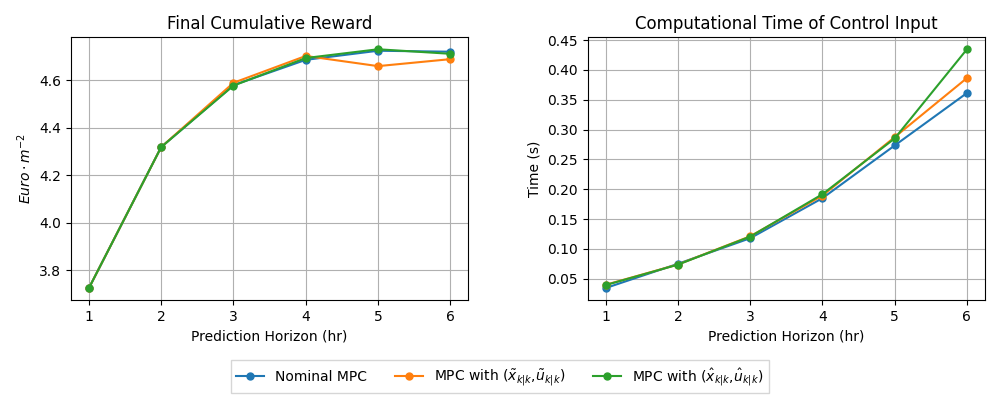

In [12]:
rlmpc_impl_1_r = {}
rlmpc_impl_1_t = {}

rlmpc_impl_2_r = {}
for j in range(1,3):
    rlmpc_impl_1_r[j] = {}
    rlmpc_impl_1_t[j] = {}

    for i in range (1,7):
        path_r = 'results/RL_MPC/Deterministic/Impl_1_guess_'+str(j)+'/'+str(i)+'_hr/Sim_0/rewards_log.csv'
        path_t = 'results/RL_MPC/Deterministic/Impl_1_guess_'+str(j)+'/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
        rlmpc_impl_1_r[j][i] = loadtxt(path_r, delimiter=',')
        rlmpc_impl_1_t[j][i] = np.mean(loadtxt(path_t, delimiter=','))

rlmpc_impl1_1_guess_1_r =[rlmpc_impl_1_r[1][1][-1],rlmpc_impl_1_r[1][2][-1],rlmpc_impl_1_r[1][3][-1],rlmpc_impl_1_r[1][4][-1],rlmpc_impl_1_r[1][5][-1],rlmpc_impl_1_r[1][6][-1]]
rlmpc_impl1_1_guess_2_r =[rlmpc_impl_1_r[2][1][-1],rlmpc_impl_1_r[2][2][-1],rlmpc_impl_1_r[2][3][-1],rlmpc_impl_1_r[2][4][-1],rlmpc_impl_1_r[2][5][-1],rlmpc_impl_1_r[2][6][-1]]

rlmpc_impl1_1_guess_1_t =[rlmpc_impl_1_t[1][1],rlmpc_impl_1_t[1][2],rlmpc_impl_1_t[1][3],rlmpc_impl_1_t[1][4],rlmpc_impl_1_t[1][5],rlmpc_impl_1_t[1][6]]
rlmpc_impl1_1_guess_2_t =[rlmpc_impl_1_t[2][1],rlmpc_impl_1_t[2][2],rlmpc_impl_1_t[2][3],rlmpc_impl_1_t[2][4],rlmpc_impl_1_t[2][5],rlmpc_impl_1_t[2][6]]
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (t,rlmpc_impl1_1_guess_1_r,marker = ".", markersize = 10, label = r"MPC with ($\tilde{x}_{k|k}$,$\tilde{u}_{k|k}$)")
ax1.plot (t,rlmpc_impl1_1_guess_2_r,marker = ".", markersize = 10, label = r"MPC with ($\hat{x}_{k|k}$,$\hat{u}_{k|k}$)")
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")

ax2.plot (t,mpc_t/1000,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (t,rlmpc_impl1_1_guess_1_t,marker = ".", markersize = 10,label = "MPC with guess 1")
ax2.plot (t,rlmpc_impl1_1_guess_2_t,marker = ".", markersize = 10,label = "MPC with guess 2")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_1.pdf', format='pdf')

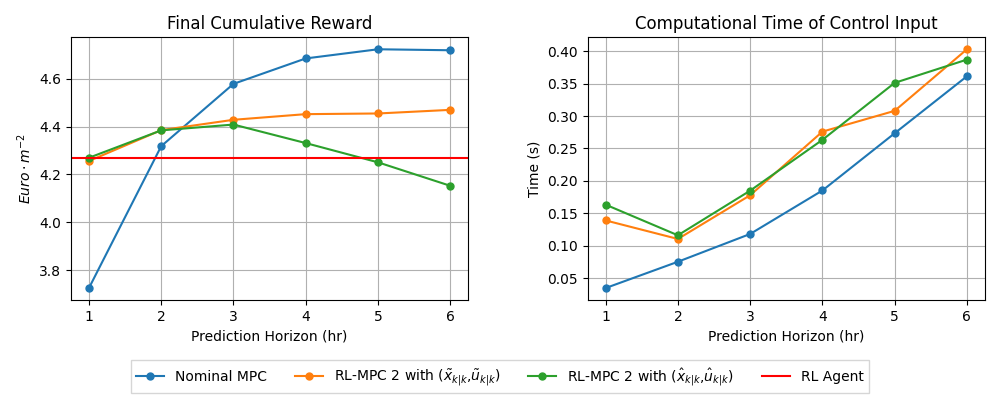

4.452110513502034

In [13]:
rlmpc_impl_2_r = {}
rlmpc_impl_2_t = {}

final_rlmpc_impl_2_r = []
final_rlmpc_impl_2_t = []

rlmpc_impl_2_1r = {}
rlmpc_impl_2_1t = {}

final_rlmpc_impl_2_1r = []
final_rlmpc_impl_2_1t = []

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Impl_2/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Impl_2/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_impl_2_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_impl_2_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_impl_2_r.append(rlmpc_impl_2_r[i][-1])
    final_rlmpc_impl_2_t.append(rlmpc_impl_2_t[i])
    
    path_r = 'results/RL_MPC/Deterministic/Impl_2.1/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Impl_2.1/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_impl_2_1r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_impl_2_1t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_impl_2_1r.append(rlmpc_impl_2_1r[i][-1])
    final_rlmpc_impl_2_1t.append(rlmpc_impl_2_1t[i])
    

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (t,final_rlmpc_impl_2_r,marker = ".", markersize = 10, label =  r"RL-MPC 2 with ($\tilde{x}_{k|k}$,$\tilde{u}_{k|k}$)")
ax1.plot (t,final_rlmpc_impl_2_1r,marker = ".", markersize = 10, label = r"RL-MPC 2 with ($\hat{x}_{k|k}$,$\hat{u}_{k|k}$)")
ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")


ax2.plot (t,mpc_t/1000,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (t,final_rlmpc_impl_2_t,marker = ".", markersize = 10,label = "RL-MPC Impl2.1")
ax2.plot (t,final_rlmpc_impl_2_1t,marker = ".", markersize = 10,label = "RL-MPC Impl2.2")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_2.pdf', format='pdf')

final_rlmpc_impl_2_r[3]

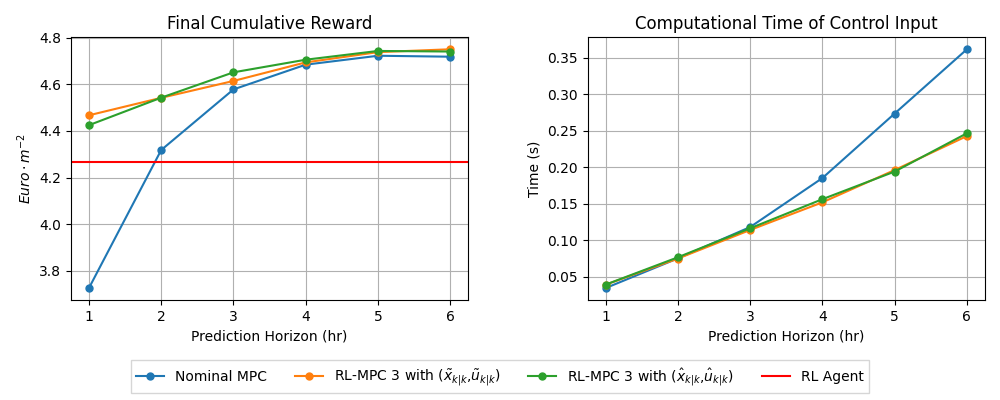

4.738697878272415


In [14]:
rlmpc_impl_3_1r = {}
rlmpc_impl_3_1t = {}

final_rlmpc_impl_3_1r = []
final_rlmpc_impl_3_1t = []

rlmpc_impl_3_2r = {}
rlmpc_impl_3_2t = {}

final_rlmpc_impl_3_2r = []
final_rlmpc_impl_3_2t = []

ttt = []

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Impl_3/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Impl_3/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_impl_3_1r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_impl_3_1t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_impl_3_1r.append(rlmpc_impl_3_1r[i][-1])
    final_rlmpc_impl_3_1t.append(rlmpc_impl_3_1t[i])
    
    path_r = 'results/RL_MPC/Deterministic/Impl_3.1/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Impl_3.1/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_impl_3_2r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_impl_3_2t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_impl_3_2r.append(rlmpc_impl_3_2r[i][-1])
    final_rlmpc_impl_3_2t.append(rlmpc_impl_3_2t[i])
    ttt.append(i)
    
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (ttt,final_rlmpc_impl_3_1r,marker = ".", markersize = 10, label = r"RL-MPC 3 with ($\tilde{x}_{k|k}$,$\tilde{u}_{k|k}$)")
ax1.plot (ttt,final_rlmpc_impl_3_2r,marker = ".", markersize = 10, label = r"RL-MPC 3 with ($\hat{x}_{k|k}$,$\hat{u}_{k|k}$)")
ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")


ax2.plot (t,mpc_t/1000,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (ttt,final_rlmpc_impl_3_1t,marker = ".", markersize = 10,label = "RL-MPC Impl3.1")
ax2.plot (ttt,final_rlmpc_impl_3_2t,marker = ".", markersize = 10,label = "RL-MPC Impl3.2")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_3.pdf', format='pdf')

print (final_rlmpc_impl_3_1r[4])

/tmp/ipykernel_13643/2938130632.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))


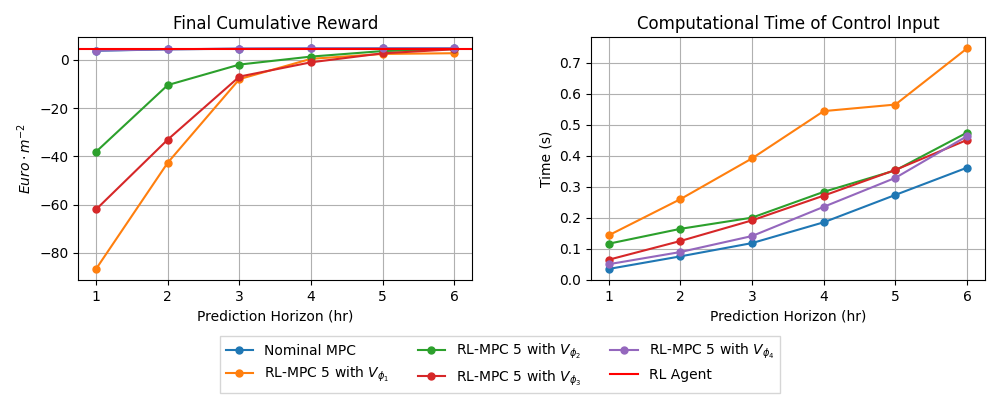

In [15]:
rlmpc_impl_4_r = {}
rlmpc_impl_4_t = {}

final_rlmpc_impl_4_r = {}
final_rlmpc_impl_4_t = {}
ttt = []

for i in range (1,5):
    rlmpc_impl_4_r[i] = {}
    rlmpc_impl_4_t[i] = {}
    
    final_rlmpc_impl_4_r[i] = []
    final_rlmpc_impl_4_t[i] = []
    for j in range (1,7):
        path_r = 'results/RL_MPC/Deterministic/Impl_4_V'+str(i)+'/'+str(j)+'_hr/Sim_0/rewards_log.csv'
        path_t = 'results/RL_MPC/Deterministic/Impl_4_V'+str(i)+'/'+str(j)+'_hr/Sim_0/comp_time_log.csv'
        rlmpc_impl_4_r[i][j] = loadtxt(path_r, delimiter=',')
        rlmpc_impl_4_t[i][j] = np.mean(loadtxt(path_t, delimiter=','))
        
        final_rlmpc_impl_4_r[i].append(rlmpc_impl_4_r[i][j][-1])
        final_rlmpc_impl_4_t[i].append(rlmpc_impl_4_t[i][j])
        ttt.append(i)
    
    

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (t,final_rlmpc_impl_4_r[1],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_1}$")
ax1.plot (t,final_rlmpc_impl_4_r[2],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_2}$")
ax1.plot (t,final_rlmpc_impl_4_r[3],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_3}$")
ax1.plot (t,final_rlmpc_impl_4_r[4],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_4}$")
ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")


ax2.plot (t,mpc_t/1000,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (t,final_rlmpc_impl_4_t[1],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_1}$")
ax2.plot (t,final_rlmpc_impl_4_t[2],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_2}$")
ax2.plot (t,final_rlmpc_impl_4_t[3],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_3}$")
ax2.plot (t,final_rlmpc_impl_4_t[4],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_4}$")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.3,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_4.pdf', format='pdf')

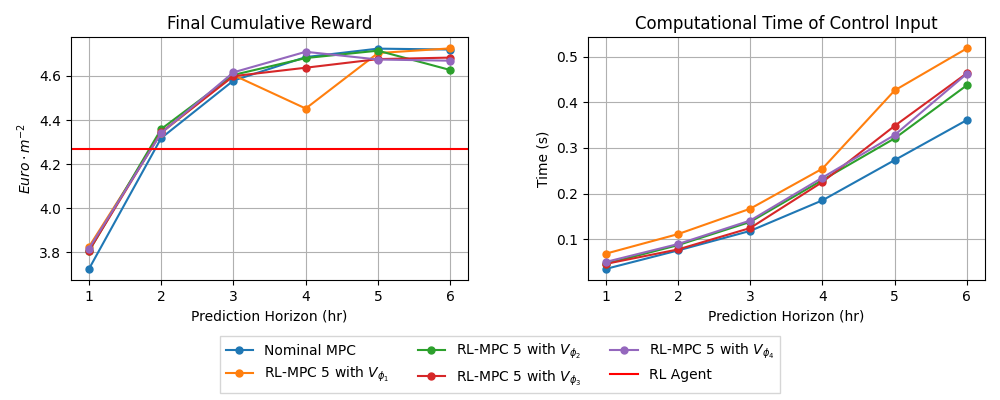

-1.0694550217343086
-99.8718496479471


In [16]:
rlmpc_impl_41_r = {}
rlmpc_impl_41_t = {}

final_rlmpc_impl_41_r = {}
final_rlmpc_impl_41_t = {}
ttt = []

for i in range (1,4):
    rlmpc_impl_41_r[i] = {}
    rlmpc_impl_41_t[i] = {}
    
    final_rlmpc_impl_41_r[i] = []
    final_rlmpc_impl_41_t[i] = []
    for j in range (1,7):
        path_r = 'results/RL_MPC/Deterministic/Impl_4_V'+str(i)+'.1/'+str(j)+'_hr/Sim_0/rewards_log.csv'
        path_t = 'results/RL_MPC/Deterministic/Impl_4_V'+str(i)+'.1/'+str(j)+'_hr/Sim_0/comp_time_log.csv'
        rlmpc_impl_41_r[i][j] = loadtxt(path_r, delimiter=',')
        rlmpc_impl_41_t[i][j] = np.mean(loadtxt(path_t, delimiter=','))
        
        final_rlmpc_impl_41_r[i].append(rlmpc_impl_41_r[i][j][-1])
        final_rlmpc_impl_41_t[i].append(rlmpc_impl_41_t[i][j])
        ttt.append(i)
    
    
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (t,final_rlmpc_impl_41_r[1],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_1}$")
ax1.plot (t,final_rlmpc_impl_41_r[2],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_2}$")
ax1.plot (t,final_rlmpc_impl_41_r[3],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_3}$")
ax1.plot (t,final_rlmpc_impl_4_r[4],marker = ".", markersize = 10 ,label = r"RL-MPC 5 with $V_{\phi_4}$")
ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")


ax2.plot (t,mpc_t/1000,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (t,final_rlmpc_impl_41_t[1],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_1}$")
ax2.plot (t,final_rlmpc_impl_41_t[2],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_2}$")
ax2.plot (t,final_rlmpc_impl_41_t[3],marker = ".", markersize = 10,label = r"RL-MPC 5 with $V_{\phi_3}$")
ax2.plot (t,final_rlmpc_impl_4_t[4],marker = ".", markersize = 10,label  = r"RL-MPC 5 with $V_{\phi_4}$")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.3,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_4_1.pdf', format='pdf')

hr = 5
print (((final_rlmpc_impl_4_r[4][hr]-mpc_r[hr])/mpc_r[hr])*100)
print (((final_rlmpc_impl_4_t[4][hr]-mpc_t[hr])/mpc_t[hr])*100)

[4.457080142977775, 4.5537393051303985, 4.654529513117587, 4.712973711047415, 4.746600206493398, 4.752974619108815]


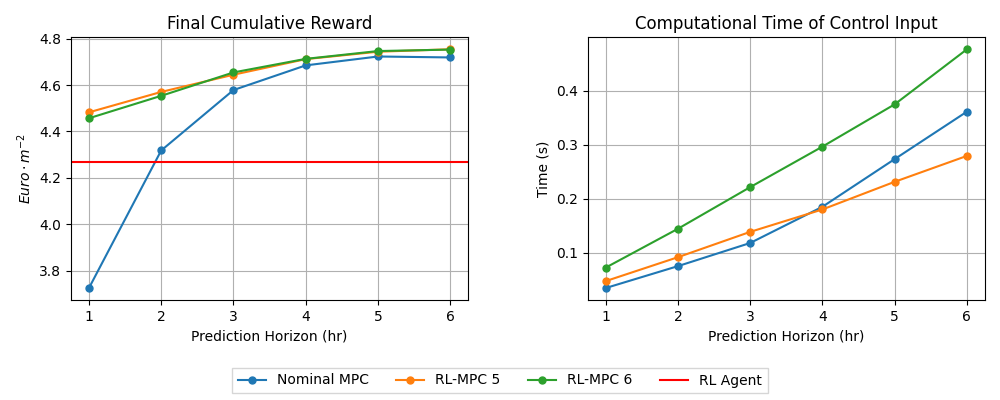

4.71181008921536


In [17]:
rlmpc_impl_5_r = {}
rlmpc_impl_5_t = {}

final_rlmpc_impl_5_r = []
final_rlmpc_impl_5_t = []
ttt = []

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Impl_5/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Impl_5/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_impl_5_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_impl_5_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_impl_5_r.append(rlmpc_impl_5_r[i][-1])
    final_rlmpc_impl_5_t.append(rlmpc_impl_5_t[i])
    ttt.append(i)
    
rlmpc_impl_6_r = {}
rlmpc_impl_6_t = {}

final_rlmpc_impl_6_r = []
final_rlmpc_impl_6_t = []
ttt = []

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Impl_6/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Impl_6/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_impl_6_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_impl_6_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_impl_6_r.append(rlmpc_impl_6_r[i][-1])
    final_rlmpc_impl_6_t.append(rlmpc_impl_6_t[i])
    ttt.append(i)
   
print (final_rlmpc_impl_6_r)
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")
ax1.plot (t,final_rlmpc_impl_5_r,marker = ".", markersize = 10, label = "RL-MPC 5")
ax1.plot (t,final_rlmpc_impl_6_r,marker = ".", markersize = 10, label = "RL-MPC 6")
ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")


ax2.plot (t,mpc_t/1000,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (t,final_rlmpc_impl_5_t,marker = ".", markersize = 10,label = "RL-MPC Impl5")
ax2.plot (t,final_rlmpc_impl_6_t,marker = ".", markersize = 10, label = "RL-MPC Impl6")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 4)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_5_6.pdf', format='pdf')

print (final_rlmpc_impl_5_r[3])

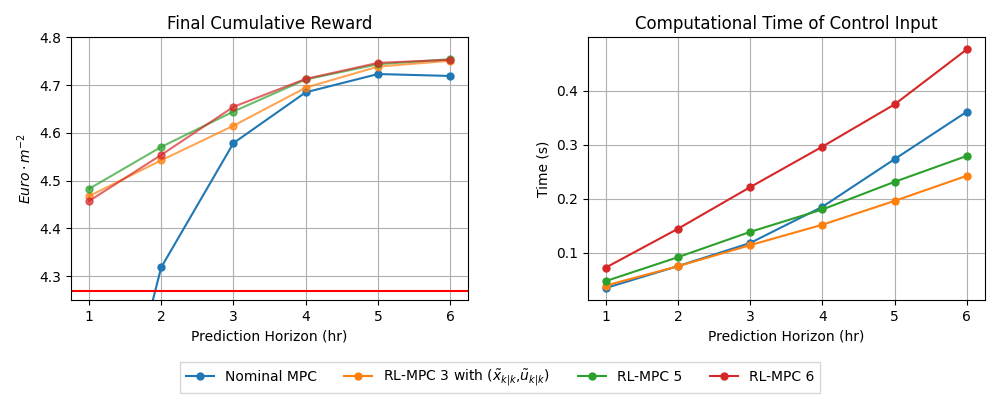

5.021042852566394
17365.414094895623


In [18]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (t,mpc_r,marker = ".", markersize = 10, label = "Nominal MPC")

ax1.plot (t,final_rlmpc_impl_3_1r,marker = ".", markersize = 10, label = "RL-MPC Impl3.1", alpha = 0.7)
# ax1.plot (t,final_rlmpc_impl_3_2r,marker = ".", markersize = 10, label = "RL-MPC Impl3.2")
ax1.plot (t,final_rlmpc_impl_5_r,marker = ".", markersize = 10, label = "RL-MPC Impl5", alpha = 0.7)
ax1.plot (t,final_rlmpc_impl_6_r,marker = ".", markersize = 10, label = "RL-MPC Impl6", alpha = 0.7)
ax1.axhline(agent_1_r[-1], label = 'RL Agent',color='r')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon (hr)")
ax1.set_ylabel("$Euro \cdot m^{-2}$")
ax1.set_ylim(4.25,4.8)


ax2.plot (t,mpc_t/1000,marker = ".", markersize = 10, label = "Nominal MPC")
ax2.plot (t,final_rlmpc_impl_3_1t,marker = ".", markersize = 10, label = r"RL-MPC 3 with ($\tilde{x}_{k|k}$,$\tilde{u}_{k|k}$)")
ax2.plot (t,final_rlmpc_impl_5_t,marker = ".", markersize = 10,label = "RL-MPC 5")
ax2.plot (t,final_rlmpc_impl_6_t,marker = ".", markersize = 10, label = "RL-MPC 6")
ax2.grid()
ax2.set_title("Computational Time of Control Input")
ax2.set_xlabel("Prediction Horizon (hr)")
ax2.set_ylabel("Time (s)")

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 5)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/rl_mpc_impl_final.pdf', format='pdf')

# print (final_rlmpc_impl_5_r[3])

h = 0
#Perf
# print ((final_rlmpc_impl_5_r[h]-mpc_r[h])/(mpc_r[h]) * 100)
print ((final_rlmpc_impl_5_r[h]-agent_1_r[-1])/(agent_1_r[-1]) * 100)

#Time
# print ((final_rlmpc_impl_5_t[h]-mpc_t[h])/(mpc_t[h]) * 100)
print ((final_rlmpc_impl_3_1t[h]-agent_1_t[-1])/(agent_1_t[-1]) * 100)

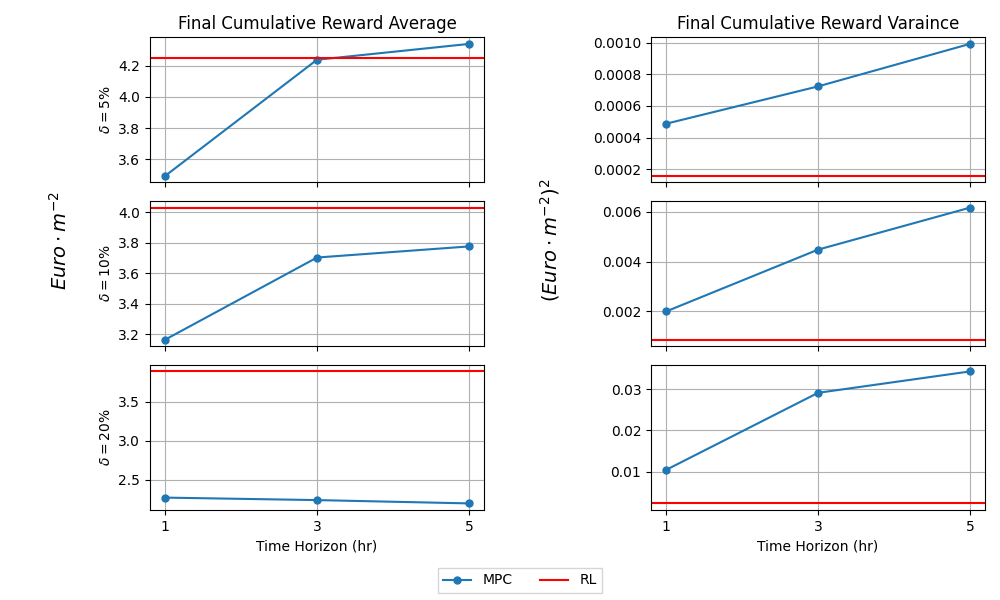

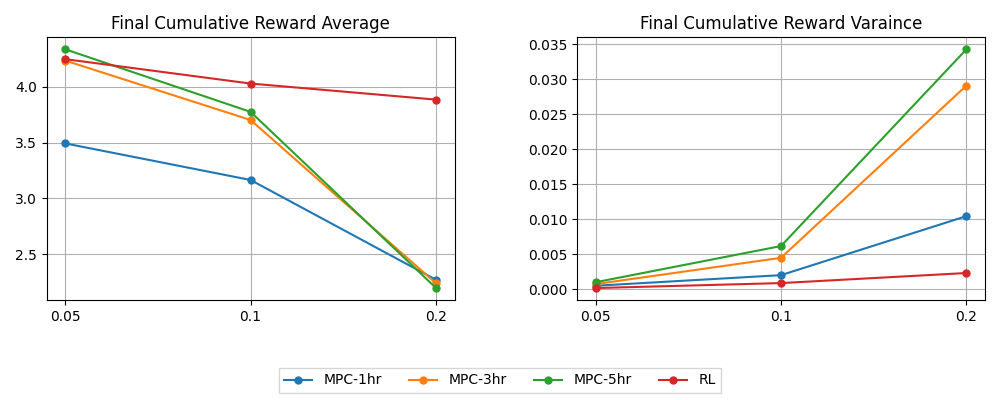

In [19]:
#mean
stochastic_rl_r = {}
stochastic_rl_v = {}

for i in  [0.05,0.1,0.2]:
    path = 'results/RL/Stochastic/'+str(i)+'/scale_'+str(i)+'/'
    stochastic_rl_r[i] = []
    for j in range (30):
        full_path_r = path + 'Sim_' + str(j) + '/rewards_log.csv'
        stochastic_rl_r[i].append (loadtxt(full_path_r, delimiter=','))
    stochastic_rl_v[i] = np.var(np.vstack(stochastic_rl_r[i]), axis=0)
    stochastic_rl_r[i] = np.mean(np.vstack(stochastic_rl_r[i]), axis=0)

stochastic_mpc_r   = {}
stochastic_mpc_v   = {}
for i in  [1,3,5]:
    path = 'results/MPC/Stochastic/'+str(i)+'_hr'
    stochastic_mpc_r[i] = {}
    stochastic_mpc_v[i] = {}
    for j in [0.05,0.1,0.2]:
        stochastic_mpc_r[i][j] = []
        stochastic_mpc_v[i][j] = []
        for h in range (30):
            full_path_r = path + '/scale_'+str(j)+'/Sim_' + str(h) + '/rewards_log.csv'
            stochastic_mpc_r[i][j].append (loadtxt(full_path_r, delimiter=','))
        stochastic_mpc_v[i][j] = np.var(np.vstack(stochastic_mpc_r[i][j]), axis=0)   
        stochastic_mpc_r[i][j] = np.mean(np.vstack(stochastic_mpc_r[i][j]), axis=0)
   

stochastic_t = ['1','3','5']



stochastic_mpc_rewards_005 = [stochastic_mpc_r[1][0.05][-1],stochastic_mpc_r[3][0.05][-1],stochastic_mpc_r[5][0.05][-1]]
stochastic_mpc_rewards_01 =  [stochastic_mpc_r[1][0.1][-1], stochastic_mpc_r[3][0.1][-1],stochastic_mpc_r[5][0.1][-1]]
stochastic_mpc_rewards_02 =  [stochastic_mpc_r[1][0.2][-1], stochastic_mpc_r[3][0.2][-1],stochastic_mpc_r[5][0.2][-1]]

stochastic_mpc_var_005 = [stochastic_mpc_v[1][0.05][-1],stochastic_mpc_v[3][0.05][-1],stochastic_mpc_v[5][0.05][-1]]
stochastic_mpc_var_01 =  [stochastic_mpc_v[1][0.1][-1], stochastic_mpc_v[3][0.1][-1], stochastic_mpc_v[5][0.1][-1]]
stochastic_mpc_var_02 =  [stochastic_mpc_v[1][0.2][-1], stochastic_mpc_v[3][0.2][-1], stochastic_mpc_v[5][0.2][-1]]

stochastic_mpc_rewards_1 = [stochastic_mpc_r[1][0.05][-1],stochastic_mpc_r[1][0.1][-1],stochastic_mpc_r[1][0.2][-1]]
stochastic_mpc_rewards_3 = [stochastic_mpc_r[3][0.05][-1], stochastic_mpc_r[3][0.1][-1],stochastic_mpc_r[3][0.2][-1]]
stochastic_mpc_rewards_5 = [stochastic_mpc_r[5][0.05][-1], stochastic_mpc_r[5][0.1][-1],stochastic_mpc_r[5][0.2][-1]]

stochastic_mpc_var_1 = [stochastic_mpc_v[1][0.05][-1], stochastic_mpc_v[1][0.1][-1],stochastic_mpc_v[1][0.2][-1]]
stochastic_mpc_var_3 = [stochastic_mpc_v[3][0.05][-1], stochastic_mpc_v[3][0.1][-1],stochastic_mpc_v[3][0.2][-1]]
stochastic_mpc_var_5 = [stochastic_mpc_v[5][0.05][-1], stochastic_mpc_v[5][0.1][-1],stochastic_mpc_v[5][0.2][-1]]



#prediction horizon as x_axis
fig,ax = plt.subplots(3,2, figsize=(10,6), sharex=True)
ax[0,0].plot (stochastic_t, stochastic_mpc_rewards_005,marker = ".", markersize = 10, label = "MPC")
ax[0,0].axhline(stochastic_rl_r[0.05][-1],color = 'red',label = "RL")
ax[0,0].grid()
ax[0,0].set_title("Final Cumulative Reward Average")
ax[0,0].set_ylabel("$\delta = 5\%$")
# fig.text(0.04, 0.75 - 0 * 0.28, f'Row {i+1}', va='center', ha='center', rotation='vertical', fontsize=14)


ax[1,0].plot (stochastic_t, stochastic_mpc_rewards_01,marker = ".", markersize = 10, label = "MPC")
ax[1,0].axhline(stochastic_rl_r[0.1][-1],color = 'red', label = "RL")
ax[1,0].grid()
ax[1,0].set_ylabel("Final Cumulative Reward Average")
ax[1,0].set_ylabel("$\delta = 10\%$")


ax[2,0].plot (stochastic_t, stochastic_mpc_rewards_02,marker = ".", markersize = 10, label = "MPC")
ax[2,0].axhline(stochastic_rl_r[0.2][-1],color = 'red',label = "RL")
ax[2,0].grid()
ax[2,0].set_ylabel("$\delta = 20\%$")
ax[2,0].set_xlabel("Time Horizon (hr)")

fig.text(0.06, 0.6, '$Euro \cdot m^{-2}$', va='center', ha='center', rotation='vertical', fontsize=14)
fig.text(0.55, 0.6, '$(Euro \cdot m^{-2})^2$', va='center', ha='center', rotation='vertical', fontsize=14)



ax[0,1].plot (stochastic_t, stochastic_mpc_var_005,marker = ".", markersize = 10, label = "MPC")
ax[0,1].axhline(stochastic_rl_v[0.05][-1],color = 'red',label = "RL")
ax[0,1].grid()
ax[0,1].set_title("Final Cumulative Reward Varaince")


ax[1,1].plot (stochastic_t, stochastic_mpc_var_01,marker = ".", markersize = 10, label = "MPC")
ax[1,1].axhline(stochastic_rl_v[0.1][-1],color = 'red', label = "RL")
ax[1,1].grid()

ax[2,1].plot (stochastic_t, stochastic_mpc_var_02,marker = ".", markersize = 10, label = "MPC")
ax[2,1].axhline(stochastic_rl_v[0.2][-1],color = 'red',label = "RL")
ax[2,1].grid()
ax[2,1].set_xlabel("Time Horizon (hr)")



handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.52, -0.00), fancybox=False, shadow=False, ncol = 5)
plt.tight_layout()
fig.subplots_adjust(bottom=0.15,wspace=0.5, left = 0.15)
plt.show()
plt.savefig('TU Delft Thesis/figures/stochastic_rl_vs_mpc.pdf', format='pdf')

#uncertainty as x_axis
stochastic_rl_rewards = [stochastic_rl_r[0.05][-1],stochastic_rl_r[0.1][-1],stochastic_rl_r[0.2][-1]]
stochastic_rl_var= [stochastic_rl_v[0.05][-1],stochastic_rl_v[0.1][-1],stochastic_rl_v[0.2][-1]]




uncertainty_x_axis = ['0.05','0.1','0.2']
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (uncertainty_x_axis, stochastic_mpc_rewards_1,marker = ".", markersize = 10, label = "MPC-1hr")
ax1.plot (uncertainty_x_axis, stochastic_mpc_rewards_3,marker = ".", markersize = 10, label = "MPC-3hr")
ax1.plot (uncertainty_x_axis, stochastic_mpc_rewards_5,marker = ".", markersize = 10, label = "MPC-5hr")
ax1.plot(uncertainty_x_axis,stochastic_rl_rewards,marker = ".", markersize = 10,label = "RL")
ax1.grid()
ax1.set_title("Final Cumulative Reward Average")

ax2.plot (uncertainty_x_axis, stochastic_mpc_var_1,marker = ".", markersize = 10, label = "MPC-1hr")
ax2.plot (uncertainty_x_axis, stochastic_mpc_var_3,marker = ".", markersize = 10, label = "MPC-2hr")
ax2.plot (uncertainty_x_axis, stochastic_mpc_var_5,marker = ".", markersize = 10, label = "MPC-3hr")
ax2.plot(uncertainty_x_axis,stochastic_rl_var,marker = ".", markersize = 10,label = "RL")
ax2.grid()
ax2.set_title("Final Cumulative Reward Varaince")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 5)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
# plt.savefig('TU Delft Thesis/figures/stochastic_rl_vs_mpc.pdf', format='pdf')



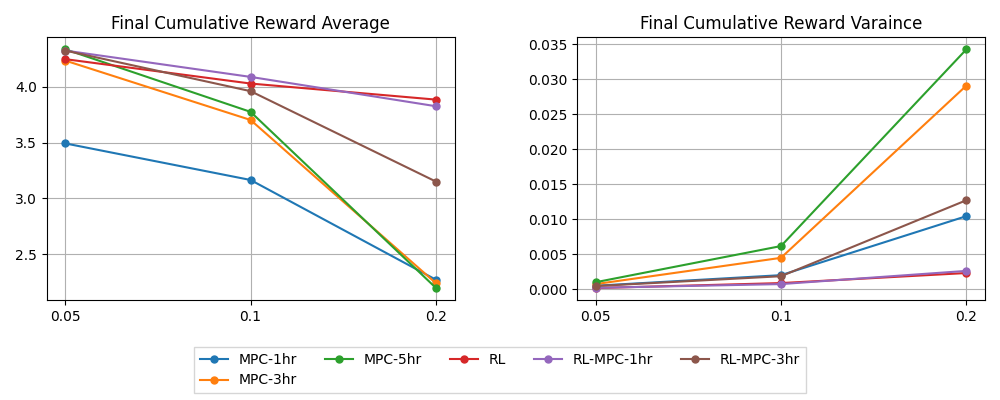

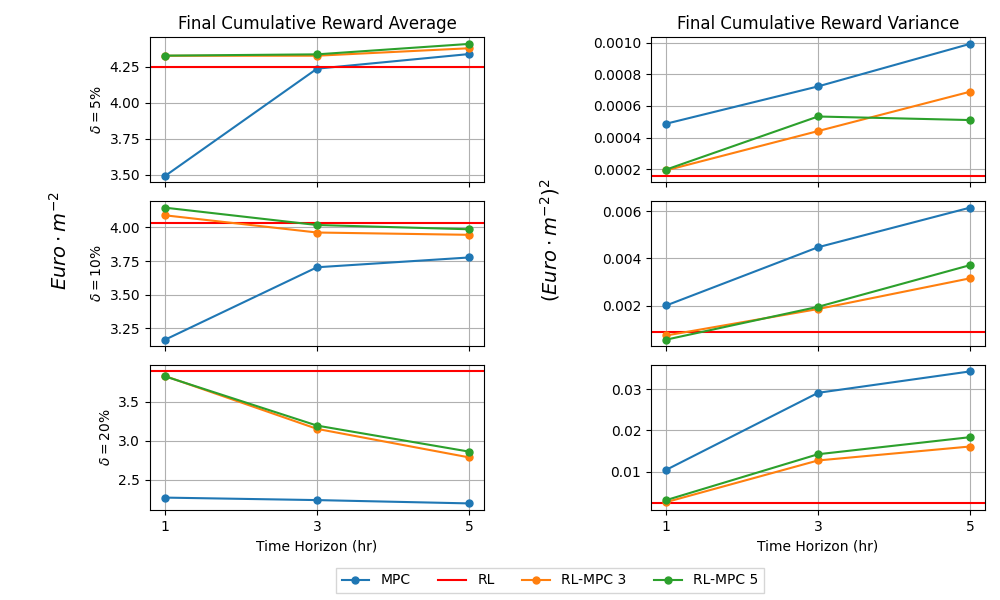

In [20]:
stochastic_rlmpc_impl3_r = {}
stochastic_rlmpc_impl3_v = {}

stochastic_rlmpc_impl5_r = {}
stochastic_rlmpc_impl5_v = {}


stochastic_rlmpc_impl2_r = []
stochastic_rlmpc_impl2_v = []

for i in  [0.05,0.1,0.2]:
    stochastic_rlmpc_impl3_r[i] = {}
    stochastic_rlmpc_impl3_v[i] = {}
    for h in [1,3,5]:
        path = 'results/RL_MPC/Stochastic/Impl_3/scale_'+str(i) + '/' + str(h) + '_hr/'
        path_impl2 = 'results/RL_MPC/Stochastic/Impl_2/scale_0.2/1_hr/'
        stochastic_rlmpc_impl3_r[i][h] = []
        stochastic_rlmpc_impl3_v[i][h] = []
        for j in range (30):
            full_path_r = path + 'Sim_' + str(j) + '/rewards_log.csv'
            stochastic_rlmpc_impl3_r[i][h].append (loadtxt(full_path_r, delimiter=','))
            stochastic_rlmpc_impl2_r.append(loadtxt(path_impl2+ 'Sim_' + str(j) + '/rewards_log.csv', delimiter=','))
            
        stochastic_rlmpc_impl3_v[i][h] = np.var(np.vstack(stochastic_rlmpc_impl3_r[i][h]), axis=0)
        stochastic_rlmpc_impl3_r[i][h] = np.mean(np.vstack(stochastic_rlmpc_impl3_r[i][h]), axis=0)

stochastic_rlmpc_impl2_v = np.var(np.vstack(stochastic_rlmpc_impl2_r), axis=0)
stochastic_rlmpc_impl2_r = np.mean(np.vstack(stochastic_rlmpc_impl2_r), axis=0)

for i in  [0.05,0.1,0.2]:
    stochastic_rlmpc_impl5_r[i] = {}
    stochastic_rlmpc_impl5_v[i] = {}
    for h in [1,3,5]:
        path = 'results/RL_MPC/Stochastic/Impl_5/scale_'+str(i) + '/' + str(h) + '_hr/'
        stochastic_rlmpc_impl5_r[i][h] = []
        stochastic_rlmpc_impl5_v[i][h] = []
        for j in range (30):
            full_path_r = path + 'Sim_' + str(j) + '/rewards_log.csv'
            stochastic_rlmpc_impl5_r[i][h].append (loadtxt(full_path_r, delimiter=','))
            
        stochastic_rlmpc_impl5_v[i][h] = np.var(np.vstack(stochastic_rlmpc_impl5_r[i][h]), axis=0)
        stochastic_rlmpc_impl5_r[i][h] = np.mean(np.vstack(stochastic_rlmpc_impl5_r[i][h]), axis=0)


fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.plot (uncertainty_x_axis, stochastic_mpc_rewards_1,marker = ".", markersize = 10, label = "MPC-1hr")
ax1.plot (uncertainty_x_axis, stochastic_mpc_rewards_3,marker = ".", markersize = 10, label = "MPC-3hr")
ax1.plot (uncertainty_x_axis, stochastic_mpc_rewards_5,marker = ".", markersize = 10, label = "MPC-5hr")
ax1.plot(uncertainty_x_axis,stochastic_rl_rewards,marker = ".", markersize = 10,label = "RL")

# ax1.plot(uncertainty_x_axis,stochastic_rl_rewards,marker = ".", markersize = 10,label = "RL")
ax1.plot([stochastic_rlmpc_impl3_r[0.05][1][-1],stochastic_rlmpc_impl3_r[0.1][1][-1],stochastic_rlmpc_impl3_r[0.2][1][-1]],marker = ".", markersize = 10, label = "RL-MPC-1hr")
ax1.plot([stochastic_rlmpc_impl3_r[0.05][3][-1],stochastic_rlmpc_impl3_r[0.1][3][-1],stochastic_rlmpc_impl3_r[0.2][3][-1]],marker = ".", markersize = 10, label = "RL-MPC-3hr")

ax1.grid()
ax1.set_title("Final Cumulative Reward Average")

ax2.plot (uncertainty_x_axis, stochastic_mpc_var_1,marker = ".", markersize = 10, label = "MPC-1hr")
ax2.plot (uncertainty_x_axis, stochastic_mpc_var_3,marker = ".", markersize = 10, label = "MPC-2hr")
ax2.plot (uncertainty_x_axis, stochastic_mpc_var_5,marker = ".", markersize = 10, label = "MPC-3hr")
ax2.plot(uncertainty_x_axis,stochastic_rl_var,marker = ".", markersize = 10,label = "RL")
ax2.plot([stochastic_rlmpc_impl3_v[0.05][1][-1],stochastic_rlmpc_impl3_v[0.1][1][-1],stochastic_rlmpc_impl3_v[0.2][1][-1]],marker = ".", markersize = 10, label = "RL-MPC-1hr")
ax2.plot([stochastic_rlmpc_impl3_v[0.05][3][-1],stochastic_rlmpc_impl3_v[0.1][3][-1],stochastic_rlmpc_impl3_v[0.2][3][-1]],marker = ".", markersize = 10, label = "RL-MPC-3hr")
ax2.grid()
ax2.set_title("Final Cumulative Reward Varaince")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.00), fancybox=False, shadow=False, ncol = 5)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3)
plt.show()
plt.savefig('TU Delft Thesis/figures/stochastic_rlmpc_impl3.pdf', format='pdf')

##------------------------------------------------------

impl3_005_r = [stochastic_rlmpc_impl3_r[0.05][1][-1],stochastic_rlmpc_impl3_r[0.05][3][-1],stochastic_rlmpc_impl3_r[0.05][5][-1]]
impl3_01_r  = [stochastic_rlmpc_impl3_r[0.1][1][-1],stochastic_rlmpc_impl3_r[0.1][3][-1],stochastic_rlmpc_impl3_r[0.1][5][-1]]
impl3_02_r  = [stochastic_rlmpc_impl3_r[0.2][1][-1],stochastic_rlmpc_impl3_r[0.2][3][-1],stochastic_rlmpc_impl3_r[0.2][5][-1]]

impl3_005_v = [stochastic_rlmpc_impl3_v[0.05][1][-1],stochastic_rlmpc_impl3_v[0.05][3][-1],stochastic_rlmpc_impl3_v[0.05][5][-1]]
impl3_01_v  = [stochastic_rlmpc_impl3_v[0.1][1][-1],stochastic_rlmpc_impl3_v[0.1][3][-1],stochastic_rlmpc_impl3_v[0.1][5][-1]]
impl3_02_v  = [stochastic_rlmpc_impl3_v[0.2][1][-1],stochastic_rlmpc_impl3_v[0.2][3][-1],stochastic_rlmpc_impl3_v[0.2][5][-1]]


impl5_005_r = [stochastic_rlmpc_impl5_r[0.05][1][-1], stochastic_rlmpc_impl5_r[0.05][3][-1], stochastic_rlmpc_impl5_r[0.05][5][-1]]
impl5_01_r  = [stochastic_rlmpc_impl5_r[0.1][1][-1], stochastic_rlmpc_impl5_r[0.1][3][-1], stochastic_rlmpc_impl5_r[0.1][5][-1]]
impl5_02_r  = [stochastic_rlmpc_impl5_r[0.2][1][-1], stochastic_rlmpc_impl5_r[0.2][3][-1], stochastic_rlmpc_impl5_r[0.2][5][-1]]

impl5_005_v = [stochastic_rlmpc_impl5_v[0.05][1][-1], stochastic_rlmpc_impl5_v[0.05][3][-1],stochastic_rlmpc_impl5_v[0.05][5][-1]]
impl5_01_v  = [stochastic_rlmpc_impl5_v[0.1][1][-1],stochastic_rlmpc_impl5_v[0.1][3][-1], stochastic_rlmpc_impl5_v[0.1][5][-1]]
impl5_02_v  = [stochastic_rlmpc_impl5_v[0.2][1][-1],stochastic_rlmpc_impl5_v[0.2][3][-1], stochastic_rlmpc_impl5_v[0.2][5][-1]]

5#prediction horizon as x_axis
fig,ax = plt.subplots(3,2, figsize=(10,6), sharex=True)
ax[0,0].plot (stochastic_t, stochastic_mpc_rewards_005,marker = ".", markersize = 10, label = "MPC")
ax[0,0].axhline(stochastic_rl_r[0.05][-1],color = 'red',label = "RL")
ax[0,0].plot (impl3_005_r,marker = ".", markersize = 10, label = "RL-MPC Impl3")
ax[0,0].plot (impl5_005_r,marker = ".", markersize = 10, label = "RL-MPC Impl5")
ax[0,0].grid()
ax[0,0].set_title("Final Cumulative Reward Average")
ax[0,0].set_ylabel("$\delta = 5\%$")
# fig.text(0.04, 0.75 - 0 * 0.28, f'Row {i+1}', va='center', ha='center', rotation='vertical', fontsize=14)


ax[1,0].plot (stochastic_t, stochastic_mpc_rewards_01,marker = ".", markersize = 10, label = "MPC")
ax[1,0].axhline(stochastic_rl_r[0.1][-1],color = 'red', label = "RL")
ax[1,0].plot (impl3_01_r,marker = ".", markersize = 10, label = "RL-MPC 3")
ax[1,0].plot (impl5_01_r,marker = ".", markersize = 10, label = "RL-MPC 5")
ax[1,0].grid()
ax[1,0].set_ylabel("Final Cumulative Reward Average")
ax[1,0].set_ylabel("$\delta = 10\%$")


ax[2,0].plot (stochastic_t, stochastic_mpc_rewards_02,marker = ".", markersize = 10, label = "MPC")
ax[2,0].axhline(stochastic_rl_r[0.2][-1],color = 'red',label = "RL")
ax[2,0].plot (impl3_02_r,marker = ".", markersize = 10, label = "RL-MPC 3")
ax[2,0].plot (impl5_02_r,marker = ".", markersize = 10, label = "RL-MPC 5")
# ax[2,0].axhline(stochastic_rlmpc_impl2_r[-1], color = 'black')
ax[2,0].grid()
ax[2,0].set_ylabel("$\delta = 20\%$")
ax[2,0].set_xlabel("Time Horizon (hr)")

fig.text(0.06, 0.6, '$Euro \cdot m^{-2}$', va='center', ha='center', rotation='vertical', fontsize=14)
fig.text(0.55, 0.6, '$(Euro \cdot m^{-2})^2$', va='center', ha='center', rotation='vertical', fontsize=14)



ax[0,1].plot (stochastic_t, stochastic_mpc_var_005,marker = ".", markersize = 10, label = "MPC")
ax[0,1].axhline(stochastic_rl_v[0.05][-1],color = 'red',label = "RL")
ax[0,1].plot (impl3_005_v,marker = ".", markersize = 10, label = "RL-MPC 3")
ax[0,1].plot (impl5_005_v,marker = ".", markersize = 10, label = "RL-MPC 5")
ax[0,1].grid()
ax[0,1].set_title("Final Cumulative Reward Variance")


ax[1,1].plot (stochastic_t, stochastic_mpc_var_01,marker = ".", markersize = 10, label = "MPC")
ax[1,1].axhline(stochastic_rl_v[0.1][-1],color = 'red', label = "RL")
ax[1,1].plot (impl3_01_v,marker = ".", markersize = 10, label = "RL-MPC 3")
ax[1,1].plot (impl5_01_v,marker = ".", markersize = 10, label = "RL-MPC 5")
ax[1,1].grid()

ax[2,1].plot (stochastic_t, stochastic_mpc_var_02,marker = ".", markersize = 10, label = "MPC")
ax[2,1].axhline(stochastic_rl_v[0.2][-1],color = 'red',label = "RL")
ax[2,1].plot (impl3_02_v,marker = ".", markersize = 10, label = "RL-MPC 3")
ax[2,1].plot (impl5_02_v,marker = ".", markersize = 10, label = "RL-MPC 5")
ax[2,1].grid()
ax[2,1].set_xlabel("Time Horizon (hr)")

handles, labels = ax[1,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.55, -0.00), fancybox=False, shadow=False, ncol = 5)
plt.tight_layout()
fig.subplots_adjust(bottom=0.15,wspace=0.5, left = 0.15)
plt.show()
plt.savefig('TU Delft Thesis/figures/stochastic_rl_vs_mpc_impl3.pdf', format='pdf')




        

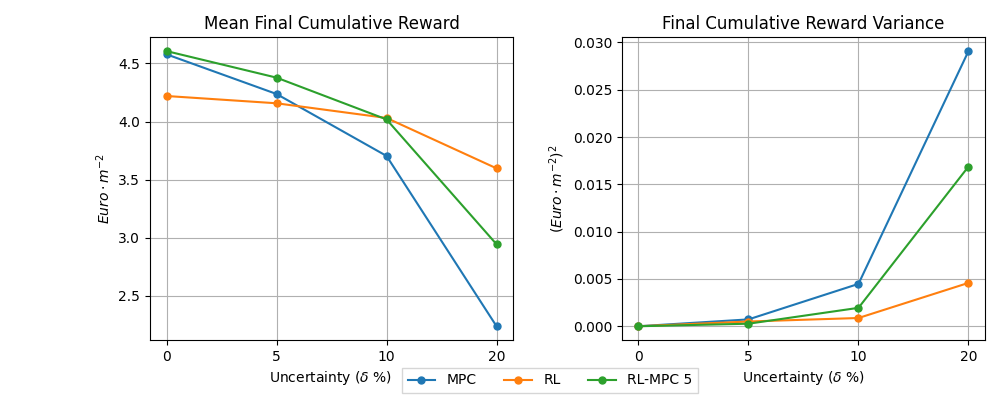

In [21]:
stochastic_rlmpc_real_r = {}
stochastic_rlmpc_real_v = {}

for i in  [0.05,0.1,0.2]:
    stochastic_rlmpc_real_r[i] = {}
    stochastic_rlmpc_real_v[i] = {}
    for h in [3]:
        path = 'results/RL_MPC/Stochastic/Real_life/scale_'+str(i) + '/' + str(h) + '_hr/'
        stochastic_rlmpc_real_r[i][h] = []
        stochastic_rlmpc_real_v[i][h] = []
        for j in range (30):
            full_path_r = path + 'Sim_' + str(j) + '/rewards_log.csv'
            stochastic_rlmpc_real_r[i][h].append (loadtxt(full_path_r, delimiter=','))
            
        stochastic_rlmpc_real_v[i][h] = np.var(np.vstack(stochastic_rlmpc_real_r[i][h]), axis=0)
        stochastic_rlmpc_real_r[i][h] = np.mean(np.vstack(stochastic_rlmpc_real_r[i][h]), axis=0)

#Nominal RL-MPC
rl_mpc_nom = loadtxt('results/RL_MPC/Stochastic/Real_life/scale_0/3_hr/Sim_0/rewards_log.csv', delimiter=',')


#RL-MPC
rlmpc_r = [rl_mpc_nom[-1],stochastic_rlmpc_real_r[0.05][3][-1],stochastic_rlmpc_real_r[0.1][3][-1],stochastic_rlmpc_real_r[0.2][3][-1]]
rlmpc_v = [0,stochastic_rlmpc_real_v[0.05][3][-1],stochastic_rlmpc_real_v[0.1][3][-1],stochastic_rlmpc_real_v[0.2][3][-1]]
#MPC
mpc_r = np.concatenate([[mpc_3hr_r[-1]],stochastic_mpc_rewards_3])
mpc_v = np.concatenate([[0],stochastic_mpc_var_3])

#RL
rl_r = mean_agent_01[:]
rl_v = variance_agent_01[:]

x = ['0','5','10','20']
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot (x,mpc_r, marker = '.', markersize = 10, label = "MPC")
ax1.plot (x,rl_r, marker = '.', markersize = 10, label = "RL")
ax1.plot (x,rlmpc_r, marker = '.', markersize = 10, label = "RL-MPC 5")
ax1.grid ()
ax1.set_ylabel("$Euro \cdot m^{-2}$")
ax1.set_xlabel("Uncertainty ($\delta$ %) ")
ax1.set_title("Mean Final Cumulative Reward")
# ax1.legend()


ax2.plot (x,mpc_v, marker = '.', markersize = 10, label = "MPC")
ax2.plot (x,rl_v, marker = '.', markersize = 10, label = "RL")
ax2.plot (x,rlmpc_v, marker = '.', markersize = 10, label = "RL-MPC 5")
ax2.grid ()
ax2.set_ylabel("$(Euro \cdot m^{-2})^2$")
ax2.set_xlabel("Uncertainty ($\delta$ %)")
ax2.set_title("Final Cumulative Reward Variance")
# ax2.legend()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.55, -0.00), fancybox=False, shadow=False, ncol = 5)
plt.tight_layout()
fig.subplots_adjust(bottom=0.15,wspace=0.3, left = 0.15)
plt.show()
plt.savefig('TU Delft Thesis/figures/stochastic_realife.pdf', format='pdf')

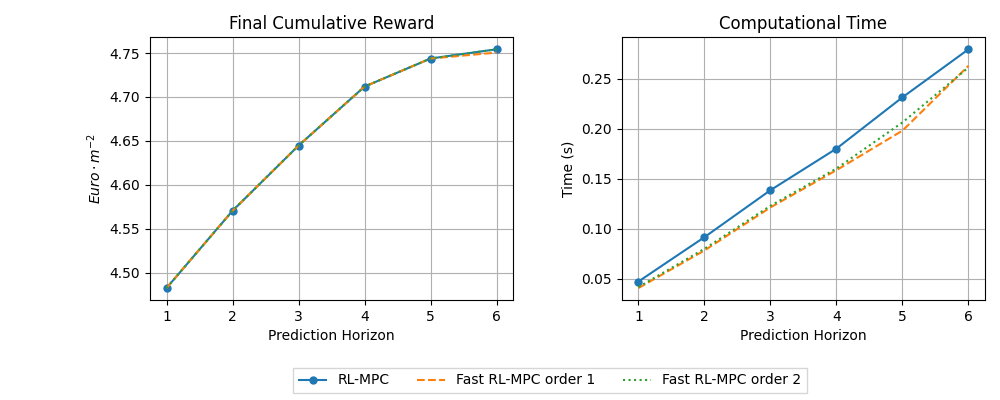

0.07840024192916435


In [22]:
rlmpc_taylor_1_r = {}
rlmpc_taylor_1_t = {}

final_rlmpc_taylor_1_r= []
final_rlmpc_taylor_1_t = []

rlmpc_taylor_2_r = {}
rlmpc_taylor_2_t = {}

final_rlmpc_taylor_2_r= []
final_rlmpc_taylor_2_t = []

rlmpc_taylor_2_full_r = {}
rlmpc_taylor_2_full_t = {}

final_rlmpc_taylor_2_full_r= []
final_rlmpc_taylor_2_full_t = []

rlmpc_taylor_1_full_r = {}
rlmpc_taylor_1_full_t = {}

final_rlmpc_taylor_1_full_r= []
final_rlmpc_taylor_1_full_t = []

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Speed_Up/taylor_1st/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Speed_Up/taylor_1st/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_taylor_1_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_taylor_1_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_taylor_1_r.append(rlmpc_taylor_1_r[i][-1])
    final_rlmpc_taylor_1_t.append(rlmpc_taylor_1_t[i])

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Speed_Up/taylor_2nd/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Speed_Up/taylor_2nd/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_taylor_2_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_taylor_2_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_taylor_2_r.append(rlmpc_taylor_2_r[i][-1])
    final_rlmpc_taylor_2_t.append(rlmpc_taylor_2_t[i])


for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Speed_Up/taylor_2nd_full/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Speed_Up/taylor_2nd_full/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_taylor_2_full_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_taylor_2_full_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_taylor_2_full_r.append(rlmpc_taylor_2_full_r[i][-1])
    final_rlmpc_taylor_2_full_t.append(rlmpc_taylor_2_full_t[i])

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Speed_Up/taylor_1st_full/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Speed_Up/taylor_1st_full/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_taylor_1_full_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_taylor_1_full_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_taylor_1_full_r.append(rlmpc_taylor_1_full_r[i][-1])
    final_rlmpc_taylor_1_full_t.append(rlmpc_taylor_1_full_t[i])    




fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)
x = [1,2,3,4,5,6]
# ax1.plot (final_mpc_r, marker = '.', markersize = 10,  label = 'MPC')
ax1.plot (x,final_rlmpc_impl_5_r, marker = '.', markersize = 10, label = 'RL-MPC')
ax1.plot (x,final_rlmpc_taylor_1_r, label = 'Fast RL-MPC order 1',linestyle = "--")
ax1.plot (x,final_rlmpc_taylor_2_r, label = 'Fast RL-MPC order 2',linestyle = ":")
# ax1.plot (final_rlmpc_taylor_2_full_r, label = 'Fast RL-MPC order 2 with full NN')
# ax1.plot (final_rlmpc_taylor_1_full_r, label = 'Fast RL-MPC order 1 with full NN')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon")
ax1.set_ylabel("$Euro \cdot m^{-2}$")



# ax2.plot (final_mpc_t, marker = '.', markersize = 10,  label = 'MPC')
ax2.plot (x,final_rlmpc_impl_5_t, marker = '.', markersize = 10, label = 'RL-MPC')
ax2.plot (x,final_rlmpc_taylor_1_t, label = 'Fast RL-MPC order 1',linestyle = "--")
ax2.plot (x,final_rlmpc_taylor_2_t, label = 'Fast RL-MPC order 2',linestyle = ":")
# ax2.plot (final_rlmpc_taylor_2_full_t, label = 'Fast RL-MPC order 2 with full NN')
# ax2.plot (final_rlmpc_taylor_1_full_t, label = 'Fast RL-MPC order 1 with full NN')
ax2.grid()
ax2.set_title("Computational Time")
ax2.set_xlabel("Prediction Horizon")
ax2.set_ylabel("Time (s)")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.55, -0.00), fancybox=False, shadow=False, ncol = 6)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3, left = 0.15)
plt.show()
plt.savefig('TU Delft Thesis/figures/taylor_speed_up.pdf', format='pdf')

print (final_rlmpc_taylor_1_t[1])

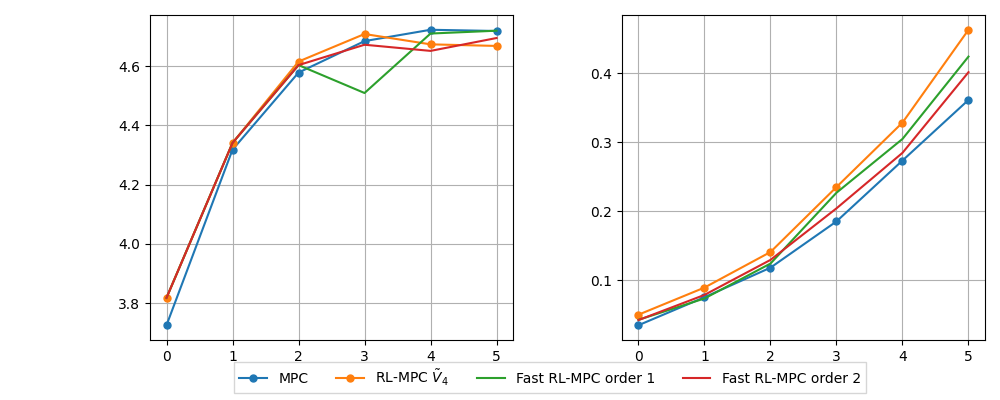

In [23]:
rlmpc_taylor_1_no_r = {}
rlmpc_taylor_1_no_t = {}

final_rlmpc_taylor_1_no_r= []
final_rlmpc_taylor_1_no_t = []

rlmpc_taylor_2_no_r = {}
rlmpc_taylor_2_no_t = {}

final_rlmpc_taylor_2_no_r= []
final_rlmpc_taylor_2_no_t = []



for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Speed_Up/taylor_1st_no_region/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Speed_Up/taylor_1st_no_region/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_taylor_1_no_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_taylor_1_no_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_taylor_1_no_r.append(rlmpc_taylor_1_no_r[i][-1])
    final_rlmpc_taylor_1_no_t.append(rlmpc_taylor_1_no_t[i])

for i in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Speed_Up/taylor_2nd_no_region/'+str(i)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Speed_Up/taylor_2nd_no_region/'+str(i)+'_hr/Sim_0/comp_time_log.csv'
    rlmpc_taylor_2_no_r[i] = loadtxt(path_r, delimiter=',')
    rlmpc_taylor_2_no_t[i] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_taylor_2_no_r.append(rlmpc_taylor_2_no_r[i][-1])
    final_rlmpc_taylor_2_no_t.append(rlmpc_taylor_2_no_t[i])


    
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot (final_mpc_r, marker = '.', markersize = 10,  label = 'MPC')
ax1.plot (final_rlmpc_impl_4_r[4],marker = ".", markersize = 10 ,label = r"RL-MPC $\tilde{V}_4$")
ax1.plot (final_rlmpc_taylor_1_no_r, label = 'Fast RL-MPC order 1')
ax1.plot (final_rlmpc_taylor_2_no_r, label = 'Fast RL-MPC order 2')
ax1.grid ()

ax2.plot (final_mpc_t, marker = '.', markersize = 10,  label = 'MPC')
ax2.plot (final_rlmpc_impl_4_t[4],marker = ".", markersize = 10 ,label = r"RL-MPC $\tilde{V}_4$")
ax2.plot (final_rlmpc_taylor_1_no_t, label = 'Fast RL-MPC order 1')
ax2.plot (final_rlmpc_taylor_2_no_t, label = 'Fast RL-MPC order 2')
ax2.grid()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.55, -0.00), fancybox=False, shadow=False, ncol = 6)
plt.tight_layout()
fig.subplots_adjust(bottom=0.15,wspace=0.3, left = 0.15)
plt.show()
plt.savefig('TU Delft Thesis/figures/speed_up_no_region', format='pdf')


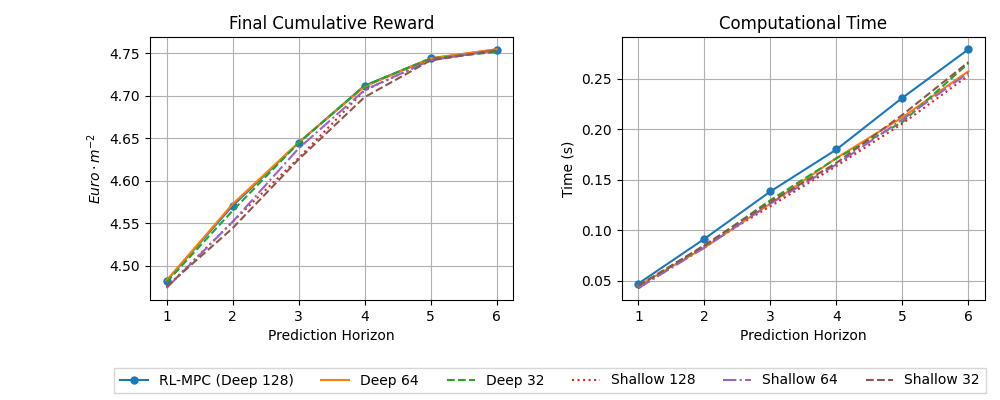

4.482813366418497
0.04513950702813266


In [24]:
rlmpc_taylor_sh_r = {}
rlmpc_taylor_sh_t = {}

final_rlmpc_sh_r= {}
final_rlmpc_sh_t ={}

rlmpc_taylor_deep_r = {}
rlmpc_taylor_deep_t = {}

final_rlmpc_deep_r= {}
final_rlmpc_deep_t ={}


for i in [8,16,32,64,128]:
    rlmpc_taylor_sh_r[i] = {}
    rlmpc_taylor_sh_t[i] = {}

    final_rlmpc_sh_r[i] = []
    final_rlmpc_sh_t[i] =[]


    for j in range (1,7):
        path_r = 'results/RL_MPC/Deterministic/Speed_Up/shallow_'+str(i)+'/'+str(j)+'_hr/Sim_0/rewards_log.csv'
        path_t = 'results/RL_MPC/Deterministic/Speed_Up/shallow_'+str(i)+'/'+str(j)+'_hr/Sim_0/comp_time_log.csv'

        rlmpc_taylor_sh_r[i][j] = loadtxt(path_r, delimiter=',')
        rlmpc_taylor_sh_t[i][j] = np.mean(loadtxt(path_t, delimiter=','))
        
        final_rlmpc_sh_r[i].append(rlmpc_taylor_sh_r[i][j][-1])
        final_rlmpc_sh_t[i].append(rlmpc_taylor_sh_t[i][j])

for i in [32,64]:
    rlmpc_taylor_deep_r[i] = {}
    rlmpc_taylor_deep_t[i] = {}

    final_rlmpc_deep_r[i] = []
    final_rlmpc_deep_t[i] =[]

    for j in range (1,7):
        path_r = 'results/RL_MPC/Deterministic/Speed_Up/deep_'+str(i)+'/'+str(j)+'_hr/Sim_0/rewards_log.csv'
        path_t = 'results/RL_MPC/Deterministic/Speed_Up/deep_'+str(i)+'/'+str(j)+'_hr/Sim_0/comp_time_log.csv'

        rlmpc_taylor_deep_r[i][j] = loadtxt(path_r, delimiter=',')
        rlmpc_taylor_deep_t[i][j] = np.mean(loadtxt(path_t, delimiter=','))
        
        final_rlmpc_deep_r[i].append(rlmpc_taylor_deep_r[i][j][-1])
        final_rlmpc_deep_t[i].append(rlmpc_taylor_deep_t[i][j])


fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)
x = [1,2,3,4,5,6]
# ax1.plot (final_mpc_r, marker = '.', markersize = 10,  label = 'MPC')
ax1.plot (x,final_rlmpc_impl_5_r, marker = '.', markersize = 10, label = 'RL-MPC (Deep 128)')
ax1.plot (x,final_rlmpc_deep_r[64], label = 'Deep 64')
ax1.plot (x,final_rlmpc_deep_r[32], label = 'Deep 32'    , linestyle = "--")
ax1.plot (x,final_rlmpc_sh_r[128], label = 'Shallow 128' , linestyle = ":")
ax1.plot (x,final_rlmpc_sh_r[64], label = 'Shallow 64'   , linestyle = "-.")
ax1.plot (x,final_rlmpc_sh_r[32], label = 'Shallow 32'   , linestyle = "--")
# ax1.plot (final_rlmpc_sh_r[8], label = 'Shallow 8')
# ax1.plot (final_rlmpc_sh_r[16], label = 'Shallow 16')
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon")
ax1.set_ylabel("$Euro \cdot m^{-2}$")

# ax2.plot (final_mpc_t, marker = '.', markersize = 10,  label = 'MPC')
ax2.plot (x,final_rlmpc_impl_5_t, marker = '.', markersize = 10, label = 'RL-MPC')
ax2.plot (x,final_rlmpc_deep_t[64], label = 'Deep 64')
ax2.plot (x,final_rlmpc_deep_t[32], label = 'Deep 32'    , linestyle = "--")
ax2.plot (x,final_rlmpc_sh_t[128], label = 'Shallow 128' , linestyle = ":")
ax2.plot (x,final_rlmpc_sh_t[64], label = 'Shallow 64'   , linestyle = "-.")
ax2.plot (x,final_rlmpc_sh_t[32], label = 'Shallow 32'   , linestyle = "--")
# ax2.plot (final_rlmpc_sh_t[8], label = 'Shallow 8')
# ax2.plot (final_rlmpc_sh_t[16], label = 'Shallow 16')
ax2.set_title("Computational Time")
ax2.set_xlabel("Prediction Horizon")
ax2.set_ylabel("Time (s)")





ax2.grid()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.55, -0.00), fancybox=False, shadow=False, ncol = 6)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3, left = 0.15)
plt.show()
plt.savefig('TU Delft Thesis/figures/speed_up_neurons.pdf', format='pdf')

print (final_rlmpc_deep_r[64][0])
print (final_rlmpc_deep_t[64][0])

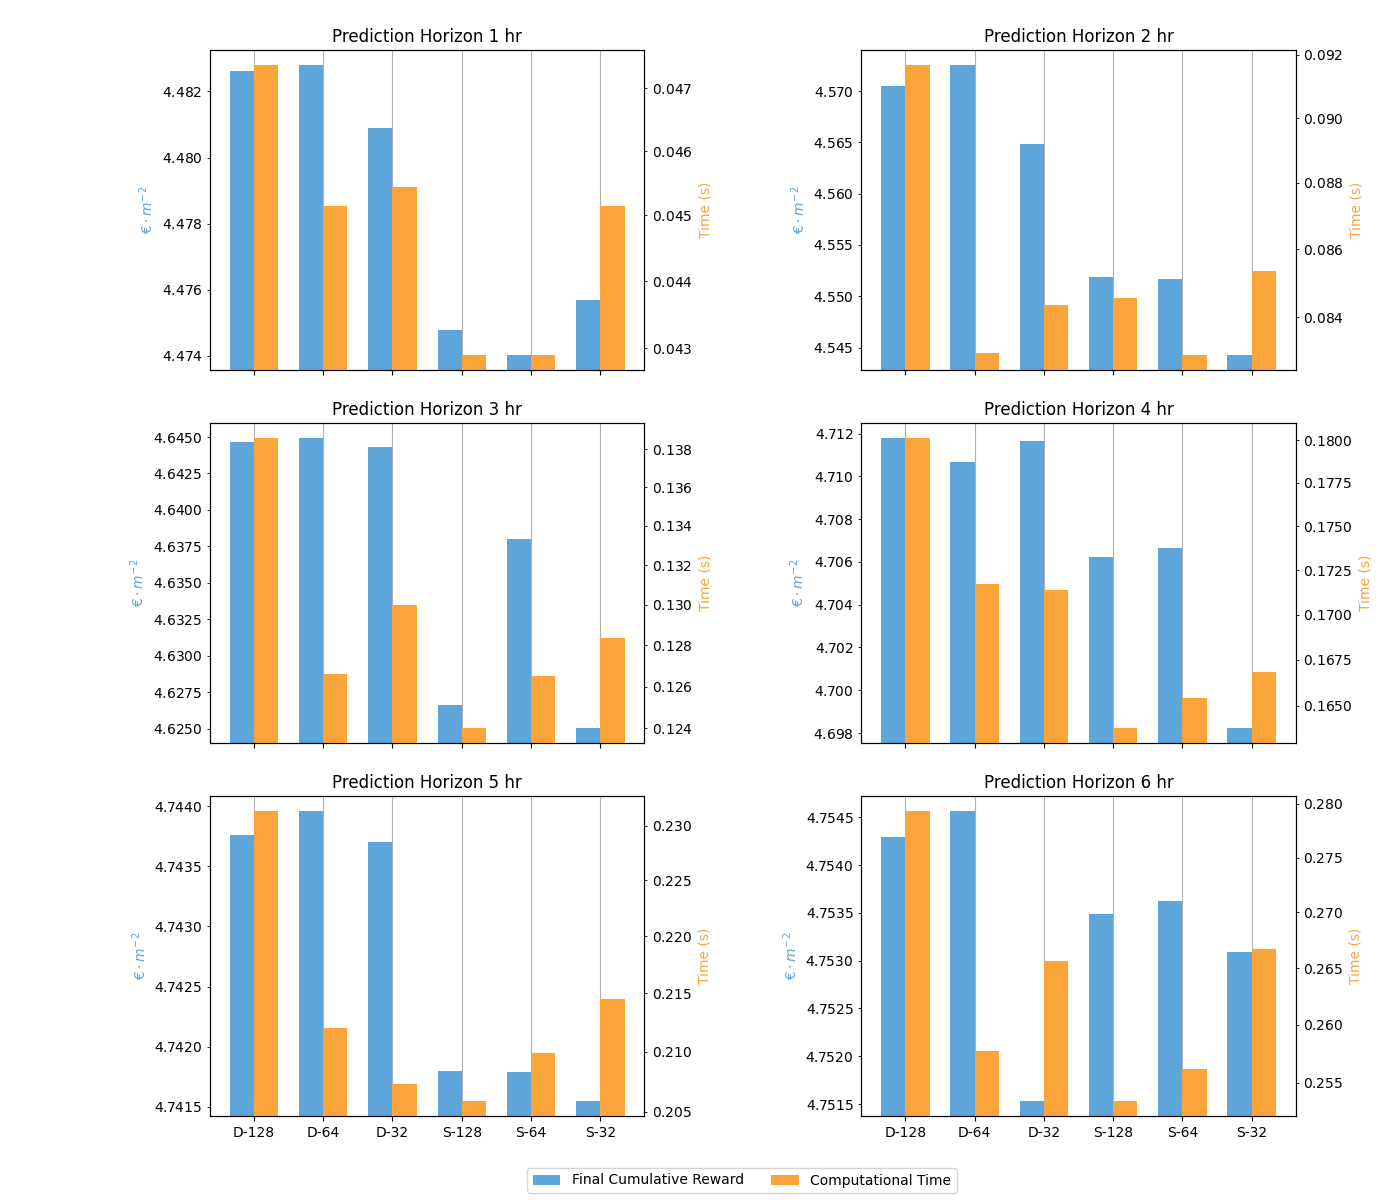

In [25]:
import matplotlib.ticker as ticker
# Example data (replace with your actual data)
x = ['D-128', 'D-64', 'D-32', 'S-128', 'S-64', 'S-32']
y1_bottoms = [4.45, 4.5, 4.6, 4.65, 4.7, 4.75]
y1_tops = [4.5, 4.6, 4.65, 4.75, 4.75, 4.76]


# Soft color palette
colour1 = '#5DA5DA'  # blue
colour2 = '#FAA43A'  # orange


# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(14, 12), sharex=True)

# Plotting each subplot
for i in range(3):
    for j in range(2):
        idx = 2 * i + j
        
        # Calculate positions for the bars
        x_pos = np.arange(len(x))
        width = 0.35
        
        ax2 = ax[i, j].twinx()
        ax[i, j].bar(x_pos - width/2, [final_rlmpc_impl_5_r[idx],
                                       final_rlmpc_deep_r[64][idx],
                                       final_rlmpc_deep_r[32][idx],
                                       final_rlmpc_sh_r[128][idx],
                                       final_rlmpc_sh_r[64][idx],
                                       final_rlmpc_sh_r[32][idx]],
                     width=width, color=colour1, align='center', label = "Final Cumulative Reward")
        
        ax2.bar(x_pos + width/2, [final_rlmpc_impl_5_t[idx],
                                  final_rlmpc_deep_t[64][idx],
                                  final_rlmpc_deep_t[32][idx],
                                  final_rlmpc_sh_t[128][idx],
                                  final_rlmpc_sh_t[64][idx],
                                  final_rlmpc_sh_t[32][idx]],
                width=width, color=colour2, align='center', label = "Computational Time")

        ax[i, j].set_yscale('log')
        ax2.set_yscale('log')
        
        # Set tick formatting for y-axes
        # Customize tick formatting for y-axes to remove exponentials
        ax[i, j].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax[i, j].yaxis.set_minor_formatter(ticker.ScalarFormatter(useMathText=True))
        
        ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        ax2.yaxis.set_minor_formatter(ticker.ScalarFormatter(useMathText=True))
        
        
        ax[i, j].grid(True)
        ax[i, j].set_title(f'Prediction Horizon {idx+1} hr')
        ax[i, j].set_xticks(x_pos)
        ax[i, j].set_xticklabels(x)
        ax[i, j].set_ylabel('$€ \cdot m^{-2}$', color=colour1)
        ax2.set_ylabel('Time (s)', color=colour2)

# Adjust layout and display plot
# Get handles and labels for the legend
handles1, labels1 = ax[0, 0].get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

# # Create legend for the entire figure
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.53, -0.0), shadow=False, ncol=2)
plt.tight_layout(pad=2)
fig.subplots_adjust(bottom=0.07,wspace=0.5, left = 0.15)




plt.savefig('TU Delft Thesis/figures/speed_up_neurons_bar_graph.png', format='png', dpi = 1000,bbox_inches='tight')
plt.show()


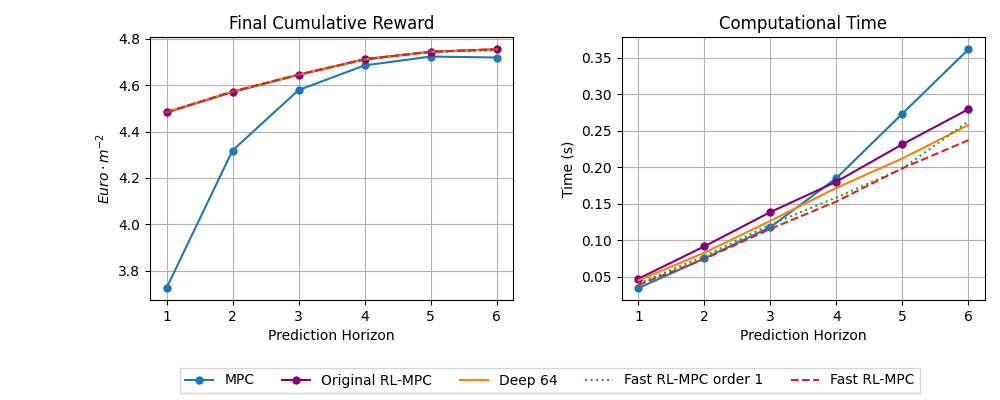

In [26]:
rlmpc_taylor_total_r = {}
rlmpc_taylor_total_t = {}

final_rlmpc_taylor_total_r = []
final_rlmpc_taylor_total_t = []

for j in range (1,7):
    path_r = 'results/RL_MPC/Deterministic/Speed_Up/Final/'+str(j)+'_hr/Sim_0/rewards_log.csv'
    path_t = 'results/RL_MPC/Deterministic/Speed_Up/Final/'+str(j)+'_hr/Sim_0/comp_time_log.csv'

    rlmpc_taylor_total_r[j] = loadtxt(path_r, delimiter=',')
    rlmpc_taylor_total_t[j] = np.mean(loadtxt(path_t, delimiter=','))
    
    final_rlmpc_taylor_total_r.append(rlmpc_taylor_total_r[j][-1])
    final_rlmpc_taylor_total_t.append(rlmpc_taylor_total_t[j])





x = [1,2,3,4,5,6]
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot (x,final_mpc_r, marker = '.', markersize = 10,  label = 'MPC')
ax1.plot (x,final_rlmpc_impl_5_r, marker = '.', markersize = 10, label = 'Original RL-MPC', color = 'purple')
ax1.plot (x,final_rlmpc_deep_r[64], label = 'Deep 64')
ax1.plot (x,final_rlmpc_taylor_1_r, label = 'Fast RL-MPC order 1',linestyle = ":")
ax1.plot (x,final_rlmpc_taylor_total_r, label = 'Fast RL-MPC',linestyle = "--")
ax1.grid ()
ax1.set_title("Final Cumulative Reward")
ax1.set_xlabel("Prediction Horizon")
ax1.set_ylabel("$Euro \cdot m^{-2}$")

ax2.plot (x,final_mpc_t, marker = '.', markersize = 10,  label = 'MPC')
ax2.plot (x,final_rlmpc_impl_5_t, marker = '.', markersize = 10, label = 'RL-MPC', color = 'purple')
ax2.plot (x,final_rlmpc_deep_t[64], label = 'Deep 64')
ax2.plot (x,final_rlmpc_taylor_1_t, label = 'Fast RL-MPC order 1',linestyle = ":")
ax2.plot (x,final_rlmpc_taylor_total_t, label = 'Fast RL-MPC',linestyle = "--")
ax2.set_title("Computational Time")
ax2.set_xlabel("Prediction Horizon")
ax2.set_ylabel("Time (s)")





ax2.grid()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.55, -0.00), fancybox=False, shadow=False, ncol = 6)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25,wspace=0.3, left = 0.15)
plt.show()
plt.savefig('TU Delft Thesis/figures/final_speed_up.pdf', format='pdf')
